#**Chennai House Price Prediction**

###**Problem Statement**
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


###**Minimum Requirements**
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.



In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [347]:
#Loading chennai house prediction dataset using pandas.
data=pd.read_csv("/content/train-chennai-sale.csv")

In [348]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [349]:
data.shape

(7109, 22)

In [350]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

N_BEDROOM and N_BATHROOM columns needs to convert as integers

In [352]:
#Return all the columns present in the dataset
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [353]:
#We can drop the PTR_ID column as it is a unique value. Also, I am dropping the REG_FEE(Registration fee) and COMMIS(Commision) column as there is nothing that those columns can conrtibute to the sales price.
data=data.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [354]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


#**Exploratory Data Analysis**

We are going to do the following steps

1.Missing value treatment

2.Checking for duplicate values

3.Correction of wrong format in the data

4.Spelling mistakes correction

5.Outlier detection

6.Feature distribution-Univariate Analysis

7.Relationship between independent and dependent feature(SalePrice)-Bivariate Analysis

8.Multivariate analysis

##**Missing value treatment**



In [355]:
#Checkng for any null values
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [356]:
#Missing value percentage
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
SALES_PRICE      0.000000
dtype: float64

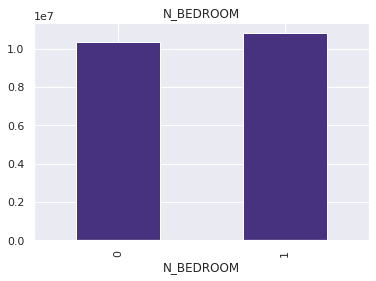

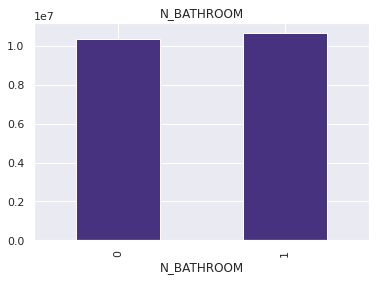

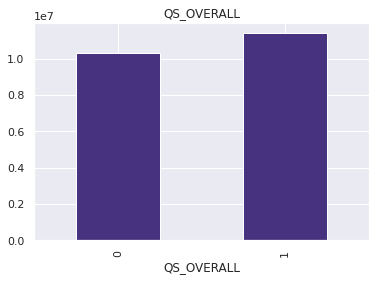

In [357]:
#Let us plot to figure out is there relation between missing values and salesprice
features_with_na=[features for features in data.columns if data[features].isnull().sum()>=1]
for feature in features_with_na:
    data1 = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data1[feature] = np.where(data1[feature].isnull(), 1, 0)
    
    # let's calculate the median SalePrice where the information is missing or present
    data1.groupby(feature)['SALES_PRICE'].median().plot.bar()
    plt.title(feature)
    plt.show()

Columns N_BEDROOM, N_BATHROOM & QS_OVERALL has some null values. Since there is a few null values we can either drop it or impute it.


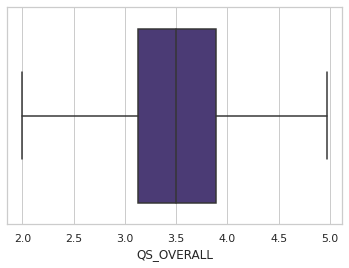

In [358]:
#Before imputing QS_OVERALL with mean we need to check for any outliers as mean is more senstive to outliers.
sns.set_style("whitegrid")
  
sns.boxplot(x = 'QS_OVERALL', data = data)

We can impute with mean since there is no outliers in QS_OVERALL.

In [359]:
#Imputing QS_overall with mean 
data['QS_OVERALL']=data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

In [360]:
#Dropped N_BATHROOM and N_BEDROOM null values since there is just 1 and 5 nan values
data=data.dropna()

In [361]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

**Creating a new column called House Age from DATE_SALE and DATE_BUILD columns**

In [362]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])
data['HOUSE_AGE'] = data['DATE_SALE'] - data['DATE_BUILD']


In [363]:
data['HOUSE_AGE'] = data['HOUSE_AGE'] / np.timedelta64(1, 'Y')


In [364]:
data[['HOUSE_AGE']].head()

,HOUSE_AGE
0,43.891387
1,10.992697
2,19.581511
3,21.985393
4,29.574871


In [365]:
#Since we have HOUSE_AGE as the new column we can drop both DATE_SALE AND DATE_BUILD columns
data=data.drop(['DATE_SALE','DATE_BUILD'],axis=1)


In [366]:
#converting HOUSE_AGE column to int64 dtype
data['HOUSE_AGE'] = data['HOUSE_AGE'].astype(np.int64)

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7103 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7103 non-null   object 
 1   INT_SQFT       7103 non-null   int64  
 2   DIST_MAINROAD  7103 non-null   int64  
 3   N_BEDROOM      7103 non-null   float64
 4   N_BATHROOM     7103 non-null   float64
 5   N_ROOM         7103 non-null   int64  
 6   SALE_COND      7103 non-null   object 
 7   PARK_FACIL     7103 non-null   object 
 8   BUILDTYPE      7103 non-null   object 
 9   UTILITY_AVAIL  7103 non-null   object 
 10  STREET         7103 non-null   object 
 11  MZZONE         7103 non-null   object 
 12  QS_ROOMS       7103 non-null   float64
 13  QS_BATHROOM    7103 non-null   float64
 14  QS_BEDROOM     7103 non-null   float64
 15  QS_OVERALL     7103 non-null   float64
 16  SALES_PRICE    7103 non-null   int64  
 17  HOUSE_AGE      7103 non-null   int64  
dtypes: float

##**Correction of wrong data format**

In [368]:
#Needs to convert N_BEDROOM,N_BATHROOM to int datatype and DATE_SALE & DATE_BUILD to datetime
data['N_BEDROOM'] = data['N_BEDROOM'].astype(np.int64)
data['N_BATHROOM'] = data['N_BATHROOM'].astype(np.int64)

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7103 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7103 non-null   object 
 1   INT_SQFT       7103 non-null   int64  
 2   DIST_MAINROAD  7103 non-null   int64  
 3   N_BEDROOM      7103 non-null   int64  
 4   N_BATHROOM     7103 non-null   int64  
 5   N_ROOM         7103 non-null   int64  
 6   SALE_COND      7103 non-null   object 
 7   PARK_FACIL     7103 non-null   object 
 8   BUILDTYPE      7103 non-null   object 
 9   UTILITY_AVAIL  7103 non-null   object 
 10  STREET         7103 non-null   object 
 11  MZZONE         7103 non-null   object 
 12  QS_ROOMS       7103 non-null   float64
 13  QS_BATHROOM    7103 non-null   float64
 14  QS_BEDROOM     7103 non-null   float64
 15  QS_OVERALL     7103 non-null   float64
 16  SALES_PRICE    7103 non-null   int64  
 17  HOUSE_AGE      7103 non-null   int64  
dtypes: float

##**Checking for duplicate values**

In [370]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


 Returns no values as there is no duplicate rows in the dataset

##**Univariate, Bivariate and Multivariate Analysis**

#**AREA**

In [371]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [372]:
data.AREA.value_counts()

Chrompet      1679
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     780
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

**Spelling mistake correction**

In [373]:
mapper = {'Karapakam':'Karapakkam','Chrmpet':'Chrompet', 'Chrompt': 'Chrompet','Chormpet':'Chrompet','KKNagar':'KK Nagar','Velchery':'Velachery','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'}
for k, v in mapper.items():
  data.loc[data['AREA'].str.contains(k), 'AREA'] = v

In [374]:
data.AREA.value_counts()

Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Text(0.5, 1.0, 'AREA wise House/Building counts')

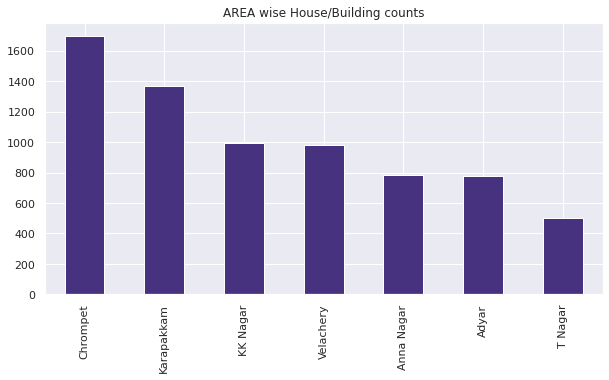

In [375]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid",palette="viridis")
data['AREA'].value_counts().plot(kind='bar');
plt.title('AREA wise House/Building counts')

- We can see most of the houses are in chrompet followed by Karapakkam and KK Nagar
- T Nagar has the low number of buildings.

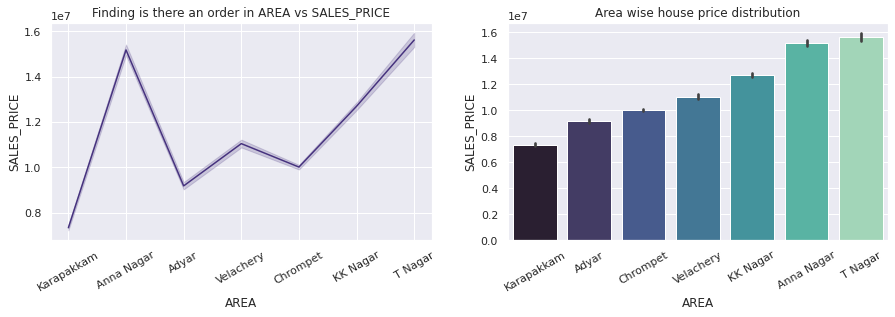

In [376]:
#Lets plot the relation between AREA and SALESPRICE
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.lineplot(x=data['AREA'],y=data['SALES_PRICE'])
plt.xticks(rotation=30)
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=data,palette='mako',order=data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('Area wise house price distribution')
plt.show()


- We can see a strong linear relationship between SALES_PRICE and AREA.
-Sales price is high in T Nagar followed by Anna Nagar and KK Nagar.
- Since there is a strong linear pattern between SALES_PRICE and AREA we can use label encoding to encode the feature AREA.

#**INT_SQFT**

In [377]:
data.INT_SQFT.value_counts()

1781    18
1538    15
1514    13
1505    13
1081    12
        ..
560      1
710      1
2392     1
565      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

<Figure size 720x432 with 0 Axes>

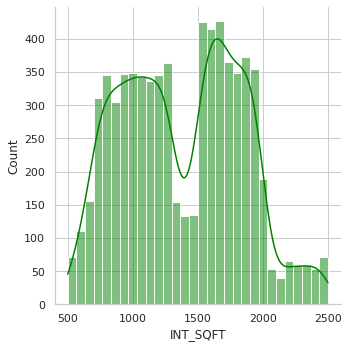

In [378]:
#INT_SQFT distribution
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.displot(data['INT_SQFT'], kde = True, color ='Green', bins = 30)

- The INT_SQFT feature is not normally distributed

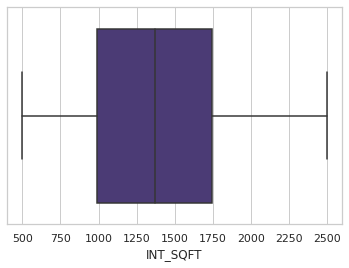

In [379]:
#Checking for outliers in INT_SQFT
sns.set_style("whitegrid")
  
sns.boxplot(x = 'INT_SQFT', data = data)

There is no outliers in INT_SQFT feature

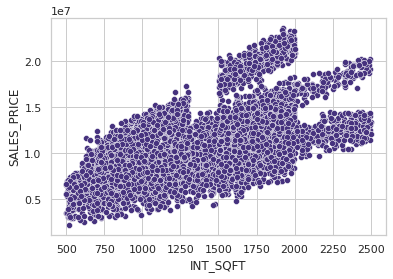

In [380]:
#Lets plot the relation between INT-SQFT and SALESPRICE
sns.scatterplot(x = "INT_SQFT", y = "SALES_PRICE", data = data, palette = "Spectral")

- In the above plot, as the sqft increases the price is also increasing.
- There is a linear relationship between SQFT and SALESPRICE

In [381]:
#Correlation between INT_SQFT  and SALES_PRICE
data[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612026
SALES_PRICE,0.612026,1.000000


- There is a positive correlation between INT_SQFT and SALES_PRICE.

Text(0.5, 1.0, 'Finding is there an order in INT_SQFT vs SALES_PRICE')

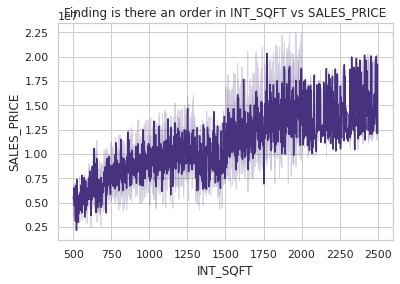

In [382]:
sns.lineplot(x=data['INT_SQFT'],y=data['SALES_PRICE'])
plt.title('Finding is there an order in INT_SQFT vs SALES_PRICE')

- There is a linear relationship between square feet of the house and the sales price. As the sqft increases the house price is also increases.

- Let us check at which area the sales price is high with given sqr feet.

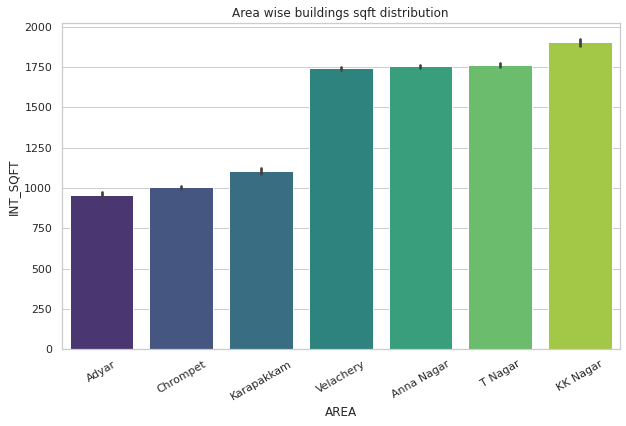

In [383]:
#AREA VS INT SQFT
plt.figure(figsize=(10,6))

sns.barplot(x='AREA',y='INT_SQFT',data=data,palette='viridis',order=data[['AREA','INT_SQFT']].groupby('AREA').mean().sort_values('INT_SQFT').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('Area wise buildings sqft distribution')
plt.show()

- KK Nagar has the bulidings with highest sqr feet followed by T Nagar, Anna Nagar and Velachery.
- Adyar area has the buildings with lowest sqrfeet.

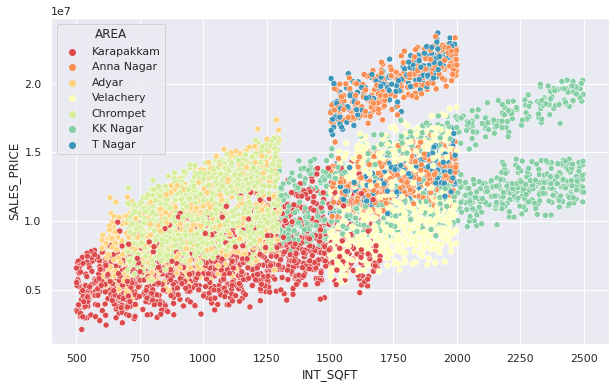

In [384]:
#Sales price vs INT_SQFT for each AREA
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid",palette="Spectral")
sns.scatterplot(x=data['INT_SQFT'],y=data.SALES_PRICE,hue=data.AREA,palette='Spectral')          

- Anna Nagar and T nagar has the highest sales price for 1500 to 2000 sqft feet houses
-Overall we can see for each and every area sales price increases with an increase in sqft.
- KK Nagar has most of the houses with the sqrft ranging 1300 to 2500 but sales price is lesser than Anna Nagar and T Nagar.Still, sales price depends mainly on the AREA rather than making much impact with sqrft. May be some more features needs to be consider for the pricing of a house in that area.
- In adyar and Chrompet area even though the houses have less sqrft the sales price is a bit higher than  other areas which have houses with same sqrft.

#**DIST_MAINROAD**

In [385]:
data.DIST_MAINROAD.unique()

array([131,  26,  70,  14,  84,  36, 137, 176, 175,  74,  78, 143,  83,
       157, 148, 134,  69, 168,  53,  96, 114, 100, 111, 105,  29,  59,
       185, 138, 173,  15, 117,  16, 130,  46, 180,  52,  86,  49, 113,
       189,  28,  51,  19, 167, 126,  75, 154,  25, 187, 200,  32,  11,
        23,  13,  58,  89,  48, 177, 116,  41, 192,  72,  24,  43,  85,
       171, 149,  73,  62, 145, 125, 121, 129,   6, 103,   8,  50,  67,
         0, 147,  71,  34, 178, 106, 144, 135,  38,  40, 142,  79,  20,
        99, 166,  63,  44,  60,  90, 169,  10, 122, 108,  98,  57, 104,
        17,   1, 109, 164, 136,  97,  37,   9, 181,  93,  81, 193,  95,
       196,  39, 141, 158, 174,  94, 124,  82,  76, 190, 194,  54,  64,
        65, 153, 115, 102,  77, 182, 163,  88,  66, 119,  18, 188, 112,
       120, 159,   4, 123,  31,   2, 156, 184, 170, 110,   7, 152,  27,
       198, 183,  12,  45, 161,  30, 118,  33,  61, 191, 160, 140,  47,
       146, 128,  80,  55, 151,   3,  92,  22,  35, 101, 127, 19

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


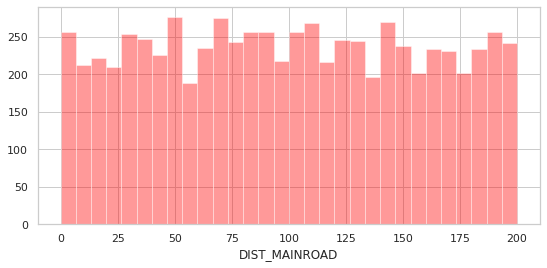

In [386]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.distplot(data['DIST_MAINROAD'], kde = False, color ='red', bins = 30)

- DIST_MAINROAD feature is showing uniform distribution.

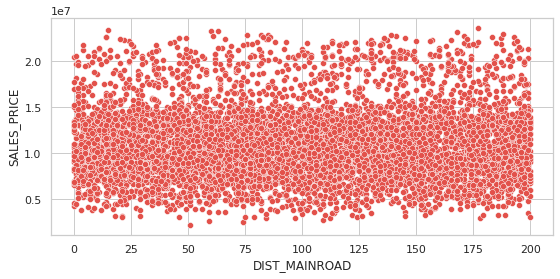

In [387]:
#DIST_MAINROAD vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.scatterplot(x = "DIST_MAINROAD", y = "SALES_PRICE", data = data)

In [388]:
data[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018679
SALES_PRICE,0.018679,1.000000


There is no correlation between DIST_MAINROAD and SALES_PRICE that we can see. Iam transforming the DIST_MAINROAD feature and checking for linear relation.

In [389]:
# data['transformed'] = np.log(data['DIST_MAINROAD'])
# data.plot(x='transformed', y='SALES_PRICE', style='o')
# plt.title('DIST_MAINROAD vs SALES_PRICE')
# plt.xlabel('DIST_MAINROAD')
# plt.ylabel('SALES_PRICE')
# plt.show()
# data[['transformed','SALES_PRICE']].corr()

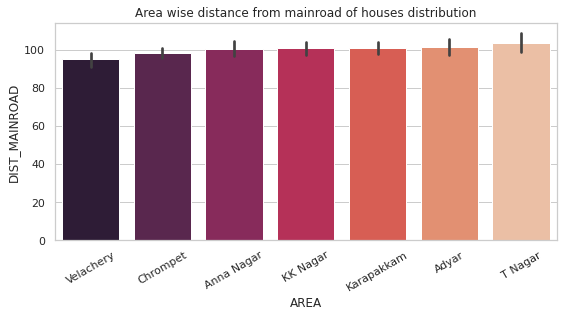

In [390]:
#DIST_MAINROAD VS AREA
plt.figure(figsize=(9,4))

sns.barplot(x='AREA',y='DIST_MAINROAD',data=data,palette='rocket',order=data[['AREA','DIST_MAINROAD']].groupby('AREA').mean().sort_values('DIST_MAINROAD').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('Area wise distance from mainroad of houses distribution')
plt.show()

- Each and every houses in the locality has equal distance from the main road it seems.
- So there won't be any change for the sales price depending on each area even though the distance varies.


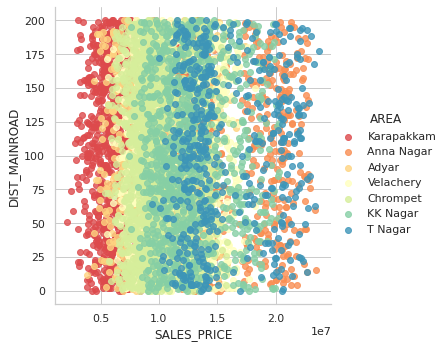

In [391]:
#DIST_MAINROAD VS SALESPRICE for each AREA
sns.lmplot(x='SALES_PRICE', y='DIST_MAINROAD', hue='AREA',palette='Spectral',
           data=data.loc[data['AREA'].isin(["Chrompet","Karapakkam","KK Nagar","Velachery","Anna Nagar","Adyar","T Nagar" ])],
           fit_reg=False)


- There is no change in sales price of each and every houses in the locality even though the distance from main road varies.
- Since there is no changes we can drop the DIST_MAINROAD feature.

In [392]:
data=data.drop(['DIST_MAINROAD'],axis=1)

#**N_BEDROOM**

In [393]:
data.N_BEDROOM.value_counts()

1    3791
2    2351
3     707
4     254
Name: N_BEDROOM, dtype: int64

Text(0.5, 1.0, 'N_BEDROOM')

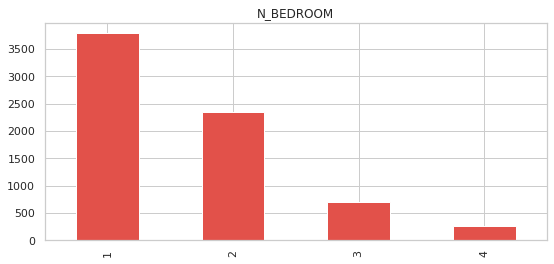

In [394]:
plt.figure(figsize=(9,4))
data['N_BEDROOM'].value_counts().plot(kind='bar');
plt.title('N_BEDROOM')

- Most of the building has 1 bedroom followed by 2.
- Most of the houses would be 1 BHK or 2BHK.Very few are 3BHK and 4BHK houses.

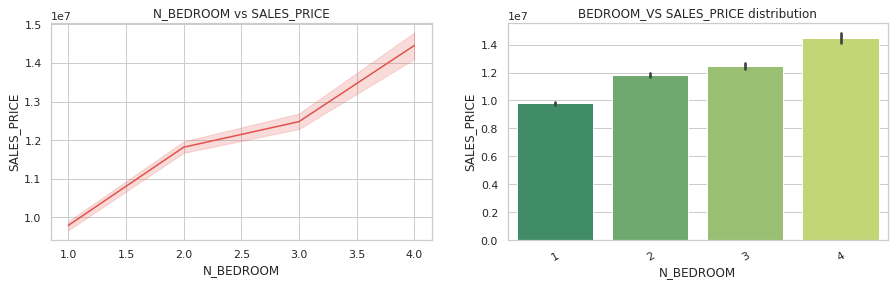

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330933
SALES_PRICE,0.330933,1.000000


In [395]:
#N_BEDROOM VS SALES_PRICE
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.lineplot(x=data['N_BEDROOM'],y=data['SALES_PRICE'])
plt.title('N_BEDROOM vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=data,palette='summer',order=data[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE').reset_index().N_BEDROOM)
plt.xticks(rotation=30)
plt.title('BEDROOM_VS SALES_PRICE distribution')
plt.show()
data[['N_BEDROOM','SALES_PRICE']].corr()

 - There is a linear relationship between BEDROOM and the target variable SALES_PRICE.
 - As the number of rooms increases the sales price also increases
 - We can now check is it the same on each area . Also, is there any correlation between INT_sqft and BEDROOM feature.
 - We can see a decent positive correlation of 0.33 between N_BEDROOM and SALES_PRICE.

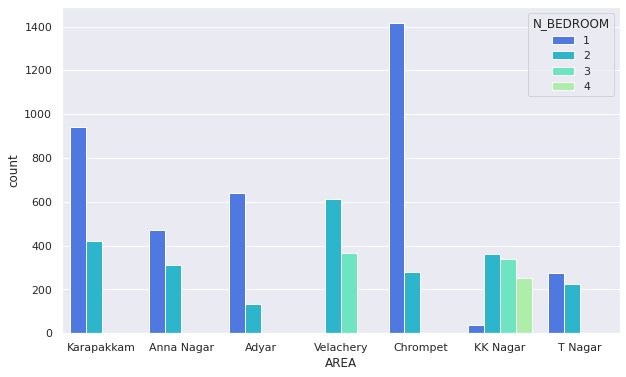

In [396]:
#BEDROOM VS AREA
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid",palette="rainbow")
sns.countplot(x="AREA", hue="N_BEDROOM", data=data)

- Most of the houses/building have 1-2 bedrooms
- In Chrompet we can see most of the buildings has only 1 bedroom followed by Karapakkam.
- Only the building in KK Nagar has 4 bedrooms

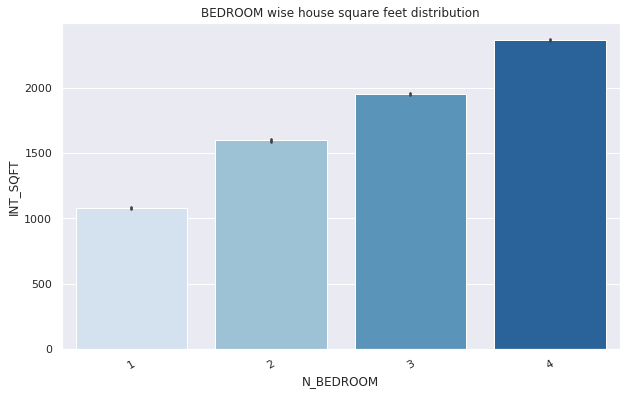

,N_BEDROOM,INT_SQFT
N_BEDROOM,1.000000,0.786392
INT_SQFT,0.786392,1.000000


In [397]:
#BEDROOM VS INT_SQFT
plt.figure(figsize=(10,6))

sns.barplot(x='N_BEDROOM',y='INT_SQFT',data=data,palette='Blues',order=data[['N_BEDROOM','INT_SQFT']].groupby('N_BEDROOM').mean().sort_values('INT_SQFT').reset_index().N_BEDROOM)
plt.xticks(rotation=30)
plt.title('BEDROOM wise house square feet distribution')
plt.show()
data[['N_BEDROOM','INT_SQFT']].corr()

- As per the GK we can see in the graph as well that if the number of bedrooms increases the sqft also increases.
- There is a high positive correlation of 0.786 that we can see between INT_SQFT and N_BEDROOM.

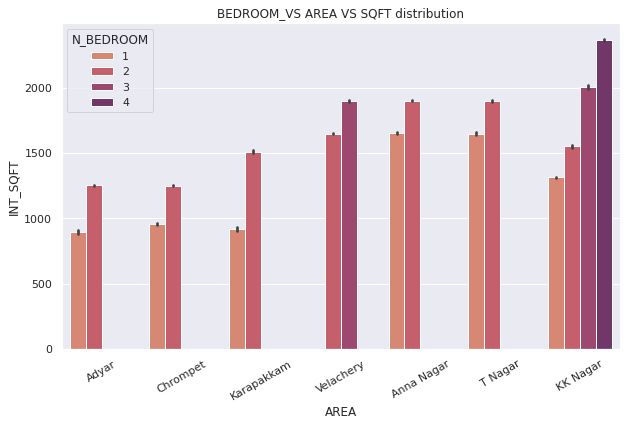

In [398]:
#BEDROOM vs AREA vs INT_SQFT
plt.figure(figsize=(10,6))
sns.barplot(x='AREA',y='INT_SQFT',data=data,palette='flare',hue='N_BEDROOM',order=data[['AREA','INT_SQFT']].groupby('AREA').mean().sort_values('INT_SQFT').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('BEDROOM_VS AREA VS SQFT distribution')
plt.show()

- As the Bedroom number increases there is increase in sqrfeet. In T Nagar and Anna Nagar most of the buildings has 1&2 bedrooms but in Velachery the sqftfeet is same as T Nagar and Anna Nagar even though there is 2&3 bedrooms buildings in Velachery.

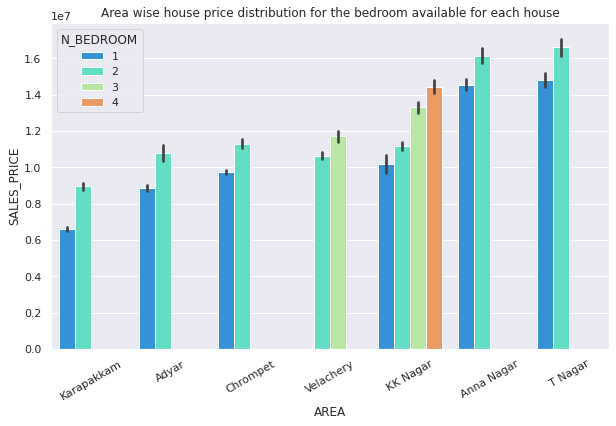

In [399]:
#SALES_PRICE of houses with N_BEDROOM in each AREA
plt.figure(figsize=(10,6))

sns.barplot(x='AREA',y='SALES_PRICE',data=data,palette='rainbow',hue='N_BEDROOM',order=data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('Area wise house price distribution for the bedroom available for each house')
plt.show()


- Still Anna Nagar and T Nagar has highest price eventhough there is more number of bedrooms per buildings in KK Nagar.
- Sales price increases as there is increase in bedrooms and sqft but it's still depends up on the AREA.

#**N_BATHROOM**

In [400]:
data.N_BATHROOM.value_counts()

1    5588
2    1515
Name: N_BATHROOM, dtype: int64

Text(0.5, 1.0, 'N_BATHROOM')

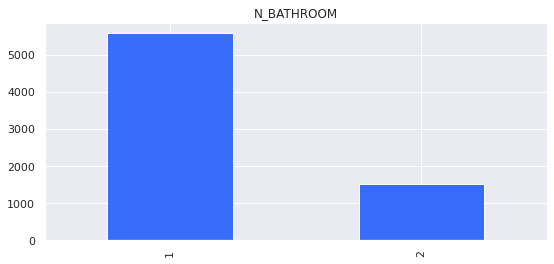

In [401]:
plt.figure(figsize=(9,4))
data['N_BATHROOM'].value_counts().plot(kind='bar');
plt.title('N_BATHROOM')

- Most of the builings consist of 1 bathroom

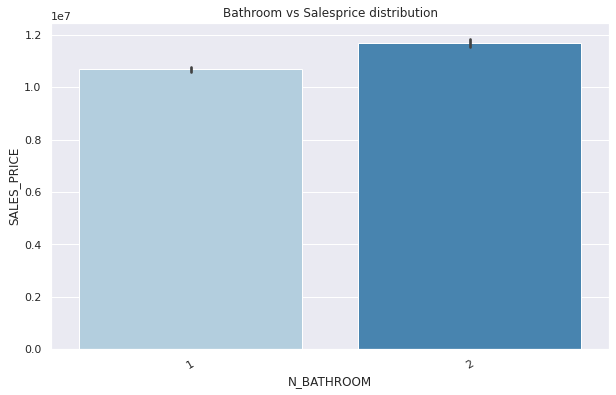

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108884
SALES_PRICE,0.108884,1.000000


In [402]:
#BATHROOM VS SALES_PRICE
plt.figure(figsize=(10,6))

sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=data,palette='Blues',order=data[['N_BATHROOM','SALES_PRICE']].groupby('N_BATHROOM').mean().sort_values('SALES_PRICE').reset_index().N_BATHROOM)
plt.xticks(rotation=30)
plt.title('Bathroom vs Salesprice distribution')
plt.show()
data[['N_BATHROOM','SALES_PRICE']].corr()


- There is low positive correlation that we can see between N_BATHROOM and SALES_PRICE.


,N_BATHROOM,N_BEDROOM
N_BATHROOM,1.000000,0.755214
N_BEDROOM,0.755214,1.000000


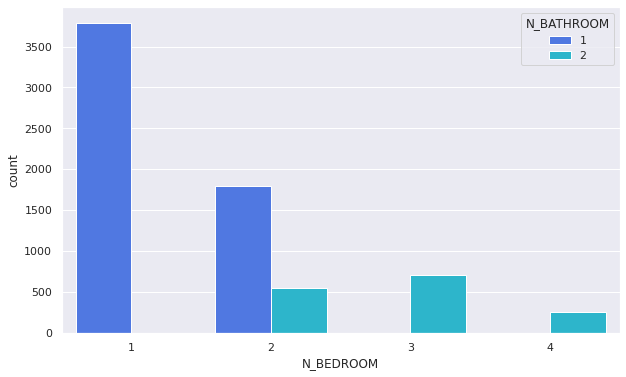

In [403]:
#N_BEDROOM VS N_BATHROOM
plt.figure(figsize=(10,6))
sns.countplot(x="N_BEDROOM", hue="N_BATHROOM", data=data)
data[['N_BATHROOM','N_BEDROOM']].corr()

- There is  a strong correlation between bedroom and bathroom.
- We can see 1 bedroom buildings has only 1 bathroom. But for bulidings which consist of 3 and 4 bedrooms has only 2 bathroom. It may be commercial,houses or any other bulid type.

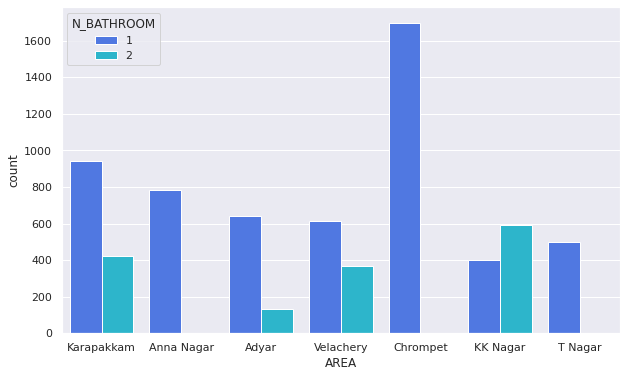

In [404]:
#BATHROOM VS AREA
plt.figure(figsize=(10,6))
sns.countplot(x="AREA", hue="N_BATHROOM", data=data)

- Chrompet, T Nagar and Anna Nagar has no building which consist of two bathrooms.


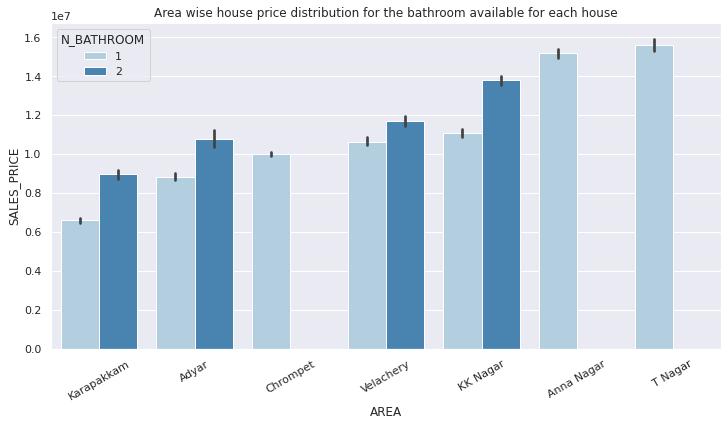

In [405]:
#N_BATHROOM VS AREA vs salesprice

plt.figure(figsize=(12,6))

sns.barplot(x='AREA',y='SALES_PRICE',data=data,palette='Blues',hue='N_BATHROOM',order=data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('Area wise house price distribution for the bathroom available for each house')
plt.show()

- We can see some of the buildings/houses in some areas don't have two bathroom facilities but still the price is high for T Nagar and Anna Nagar followed by KK Nagar.

#**N_ROOM**

In [406]:
data.N_ROOM.value_counts()

4    2561
3    2122
5    1245
2     921
6     254
Name: N_ROOM, dtype: int64

Text(0.5, 1.0, 'N_ROOM')

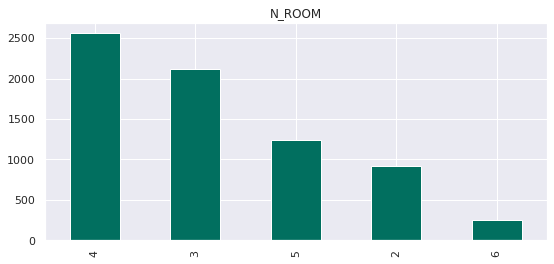

In [407]:
#N_ROOM distribution
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
data['N_ROOM'].value_counts().plot(kind='bar');
plt.title('N_ROOM')

- Most of the buildings has 4 rooms followed by 3 and 5

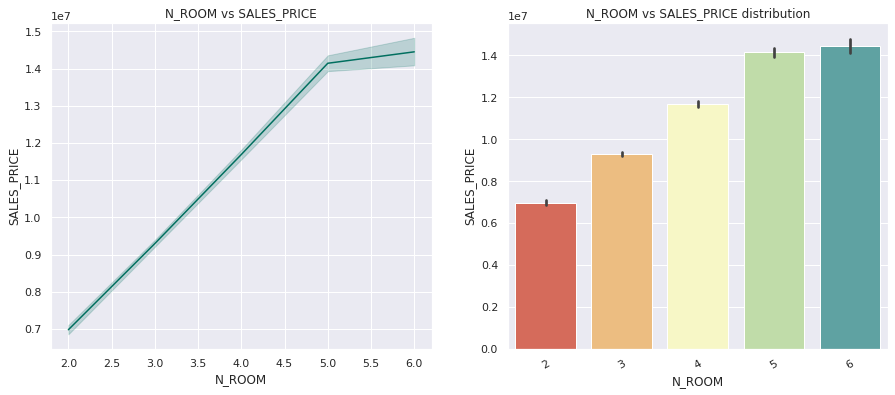

,N_ROOM,SALES_PRICE
N_ROOM,1.000000,0.602637
SALES_PRICE,0.602637,1.000000


In [408]:
#N_ROOM VS SALES PRICE
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=data['N_ROOM'],y=data['SALES_PRICE'])
plt.title('N_ROOM vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=data,palette='Spectral',order=data[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').reset_index().N_ROOM)
plt.xticks(rotation=30)
plt.title('N_ROOM vs SALES_PRICE distribution')
plt.show()
data[['N_ROOM','SALES_PRICE']].corr()

- We can see a linear relation between the sales price and the number of rooms available in each building or houses.
- As there is an increase in number of rooms there is an increase in sales price.
- There is a positive correlation of 0.60 between N_ROOM and SALES_PRICE.

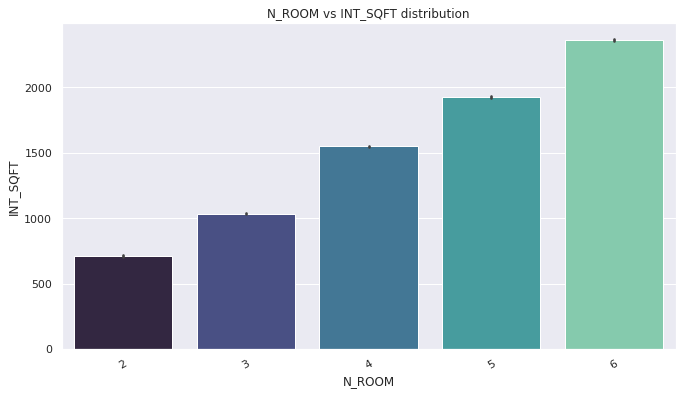

,N_ROOM,INT_SQFT
N_ROOM,1.000000,0.951271
INT_SQFT,0.951271,1.000000


In [409]:
#N_ROOM VS SQRFT
plt.figure(figsize=(11,6))
sns.barplot(x='N_ROOM',y='INT_SQFT',data=data,palette='mako',order=data[['N_ROOM','INT_SQFT']].groupby('N_ROOM').mean().sort_values('INT_SQFT').reset_index().N_ROOM)
plt.xticks(rotation=30)
plt.title('N_ROOM vs INT_SQFT distribution')
plt.show()
data[['N_ROOM','INT_SQFT']].corr()

-There is high positive correlation of 0.95 between N_ROOM and INT_SQFT.
- As we know as the room numbers increases there will be an increase in sqft.

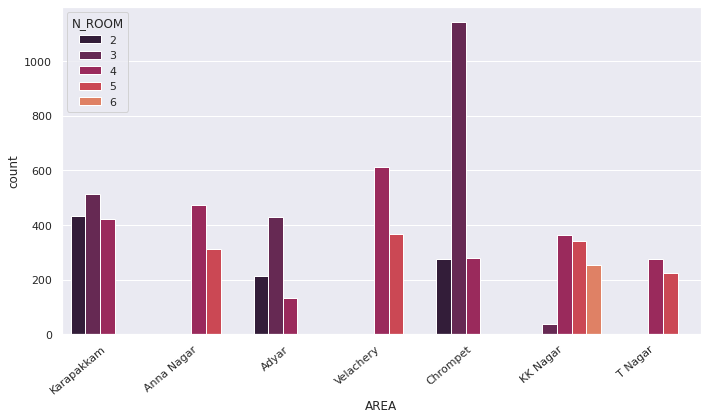

In [410]:
#N_ROOM VS AREA
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="rocket")
ax=sns.countplot(x="AREA", hue="N_ROOM", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- Chrompet has more than 1000 buildings which 3 rooms.
- KK Nagar is the only place where buildings are available with 5 and 6 number of rooms.
- Only Adyar,Karapakkam and Chrompet has buildings with 2 number of rooms.

#**QS_ROOMS**

In [411]:
data.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

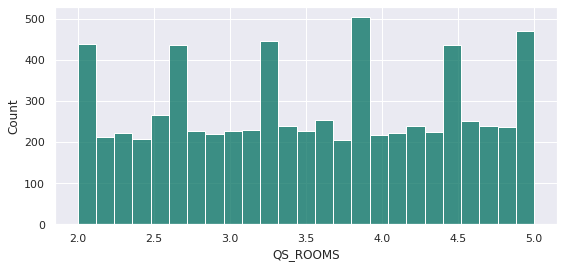

In [412]:
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(data['QS_ROOMS'],bins = 25)

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.00000,0.02196
SALES_PRICE,0.02196,1.00000


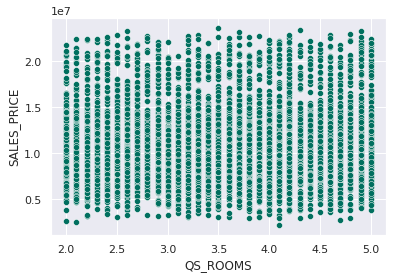

In [413]:
#QS_ROOMS vs SALES_PRICE
sns.scatterplot(x = "QS_ROOMS", y = "SALES_PRICE", data = data, palette = "Spectral")
data[['QS_ROOMS','SALES_PRICE']].corr()

- There is no relation that we can see between QS_ROOMS and SALES_PRICE

#**QS_BATHROOM**

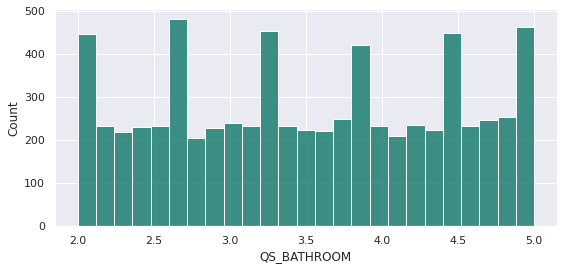

In [414]:
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(data['QS_BATHROOM'],bins = 25)

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011361
SALES_PRICE,-0.011361,1.000000


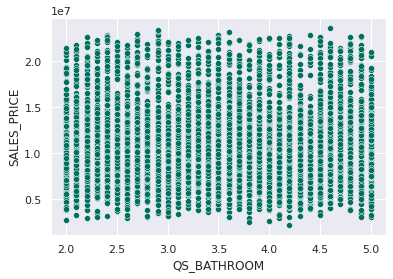

In [415]:
#QS_BATHROOM vs SALES_PRICE
sns.scatterplot(x = "QS_BATHROOM", y = "SALES_PRICE", data = data, palette = "rainbow")
data[['QS_BATHROOM','SALES_PRICE']].corr()

- There is no relation that we can see between QS_BATHROOMS and SALES_PRICE

#**QS_BEDROOM**

In [416]:
data.QS_BEDROOM.value_counts()

2.6    273
3.2    252
4.0    248
2.4    244
3.8    244
3.1    243
2.1    242
3.0    240
3.4    239
2.2    237
4.3    237
3.5    237
4.4    237
3.3    234
4.6    233
4.7    227
2.5    226
4.5    226
3.6    225
4.1    223
2.7    222
3.9    220
2.9    219
2.0    219
5.0    217
4.2    212
4.8    211
2.8    210
3.7    203
4.9    203
2.3    200
Name: QS_BEDROOM, dtype: int64

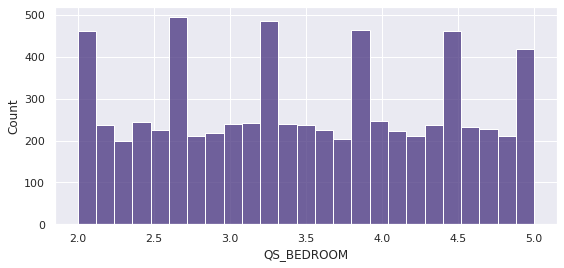

In [417]:
sns.set_theme(style="darkgrid",palette="viridis")
plt.figure(figsize=(9,4))
sns.histplot(data['QS_BEDROOM'],bins = 25)

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.00000,0.01843
SALES_PRICE,0.01843,1.00000


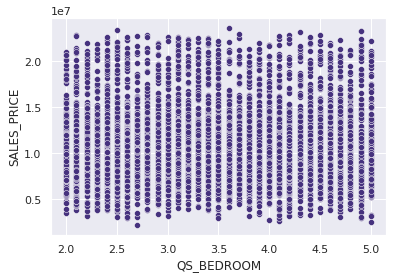

In [418]:
#QS_BEDROOM vs SALES_PRICE
sns.scatterplot(x = "QS_BEDROOM", y = "SALES_PRICE", data = data, palette = "Spectral")
data[['QS_BEDROOM','SALES_PRICE']].corr()

- There is no relation that we can see between QS_BEDROOMS and SALES_PRICE 

#**QS_OVERALL**

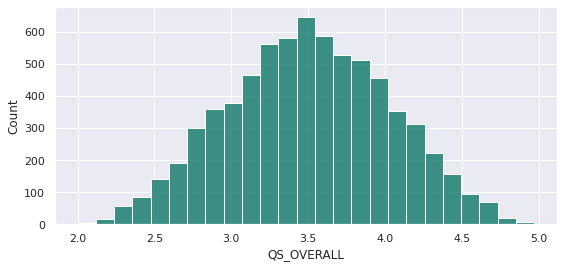

In [419]:
#QS_OVERALL distirbution
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(data['QS_OVERALL'],bins = 25)

 The QS_OVERALL feature is normally distributed here.

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020282
SALES_PRICE,0.020282,1.000000


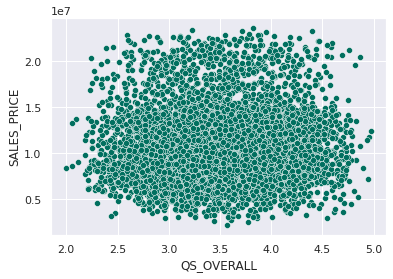

In [420]:
#QS_OVERALL vs SALES_PRICE
sns.scatterplot(x = "QS_OVERALL", y = "SALES_PRICE", data = data, palette = "Spectral")
data[['QS_OVERALL','SALES_PRICE']].corr()

- There is no relation that we can see between QS_OVERALL and SALES_PRICE

#**HOUSE_AGE**

In [421]:
data.HOUSE_AGE.value_counts()

19    218
27    203
29    200
16    198
6     190
18    187
11    183
4     183
24    183
7     183
22    183
15    181
13    181
23    181
20    180
5     180
28    177
21    177
10    176
25    176
12    176
8     176
33    169
9     168
14    167
17    166
36    165
35    161
39    159
26    157
31    151
34    151
38    146
37    144
32    136
30    134
43     99
41     91
42     87
40     87
44     75
47     56
49     56
45     51
3      50
48     46
46     46
50     34
54     25
53     21
52     17
51     11
55      5
Name: HOUSE_AGE, dtype: int64

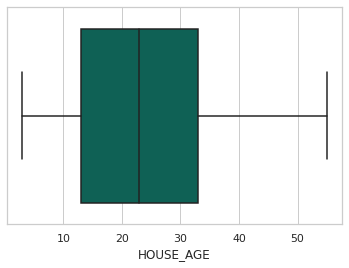

In [422]:
#Checking for outliers in HOUSE_AGE
sns.set_style("whitegrid")
  
sns.boxplot(x = 'HOUSE_AGE', data = data)

- There is no outliers that we can find in HOUSE_AGE

<Figure size 648x288 with 0 Axes>

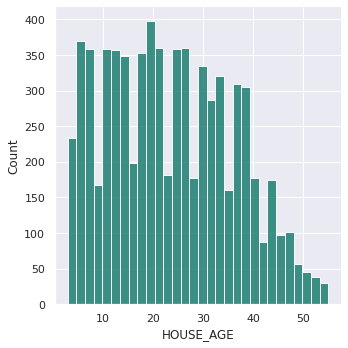

In [423]:
#HOUSE_AGE distribution
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.displot(data['HOUSE_AGE'],bins = 30)


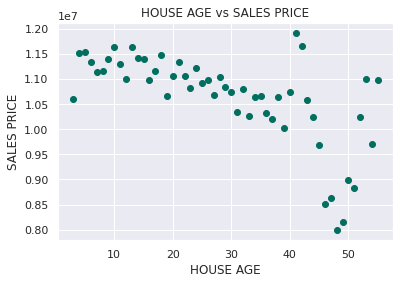

,HOUSE_AGE,SALES_PRICE
HOUSE_AGE,1.000000,-0.118999
SALES_PRICE,-0.118999,1.000000


In [424]:
#HOUSE_AGE vs SALES_PRICE
data.groupby('HOUSE_AGE')['SALES_PRICE'].mean().plot(style='o')
plt.title('HOUSE AGE vs SALES PRICE')
plt.xlabel('HOUSE AGE')
plt.ylabel('SALES PRICE')
plt.show()
data[['HOUSE_AGE','SALES_PRICE']].corr()   

- As the House age increases we can see a decrease in sales price.
- Both are negatively correlated.

#**SALE_COND, PARK_FACIL, BUILDTYPE,  UTILITY_AVAIL, STREET, MZZONE**

**Spelling mistakes correction**

In [425]:
#SALE_COND
data['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)

In [426]:
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1430
Normal Sale    1422
AbNormal       1410
Family         1402
Name: SALE_COND, dtype: int64

In [427]:
#PARK_FACIL
data['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
data.PARK_FACIL.value_counts()

Yes    3584
No     3519
Name: PARK_FACIL, dtype: int64

In [428]:
#BUILD_TYPE
data['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
data.BUILDTYPE.value_counts()

House         2443
Others        2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [429]:
#UTILITY_AVAIL
data['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
data.UTILITY_AVAIL.value_counts()

No Sewer    3696
AllPub      1886
ELO         1521
Name: UTILITY_AVAIL, dtype: int64

In [430]:
#STREET
data['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
data.STREET.value_counts()

Paved        2570
Gravel       2518
No Access    2015
Name: STREET, dtype: int64

In [431]:
#MZZONE - No spelling to correct
data.MZZONE.value_counts()

RL    1856
RH    1822
RM    1813
C      550
A      537
I      525
Name: MZZONE, dtype: int64

#**SALE_COND**

In [432]:
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1430
Normal Sale    1422
AbNormal       1410
Family         1402
Name: SALE_COND, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (SALE_COND WISE)')

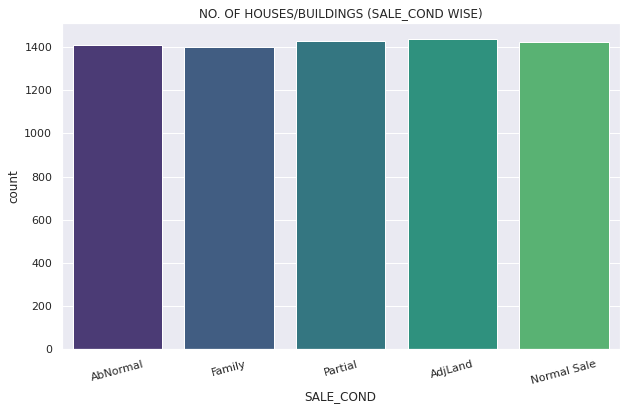

In [433]:
#SALE_COND distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="viridis")
sns.countplot(x='SALE_COND',data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES/BUILDINGS (SALE_COND WISE)')

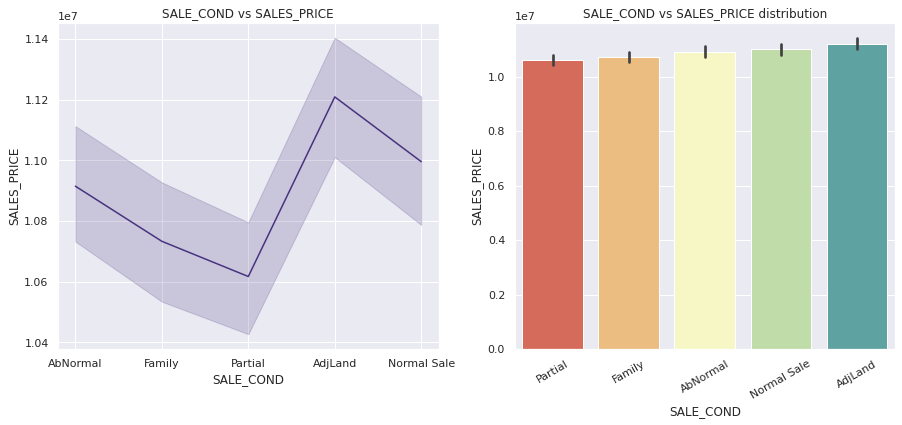

In [434]:
#SALE_COND VS SALES_PRICE
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=data['SALE_COND'],y=data['SALES_PRICE'])
plt.title('SALE_COND vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=data,palette='Spectral',order=data[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index().SALE_COND)
plt.xticks(rotation=30)
plt.title('SALE_COND vs SALES_PRICE distribution')
plt.show()


- We can see a linear relationship between SALE_COND vs SALES_PRICE.
- Partial has the lowest sales price and Adjland has the highest sales price.
- We can use label encoding for the SALE_COND feature

#**BUILD_TYPE**

In [435]:
data.BUILDTYPE.value_counts()

House         2443
Others        2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (BUILDTYPE wise)')

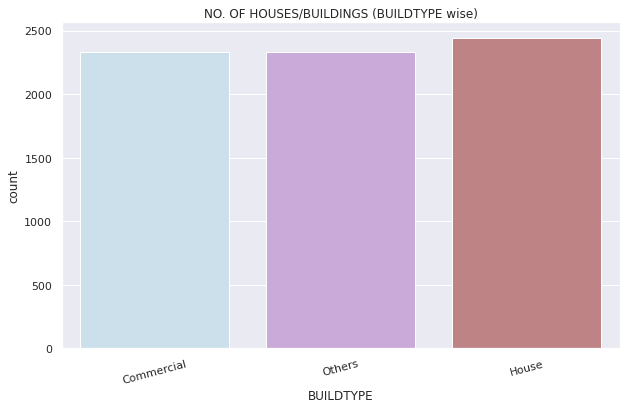

In [436]:
#BUILDTYPE distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="cubehelix_r")
sns.countplot(x='BUILDTYPE',data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES/BUILDINGS (BUILDTYPE wise)')

- Most of the building types are Houses followed by others and Commercial.
- Let us check the distribution of these buildings in different areas

Text(0.5, 1.0, 'MEAN SALES_PRICE (BUILDTYPE WISE)')

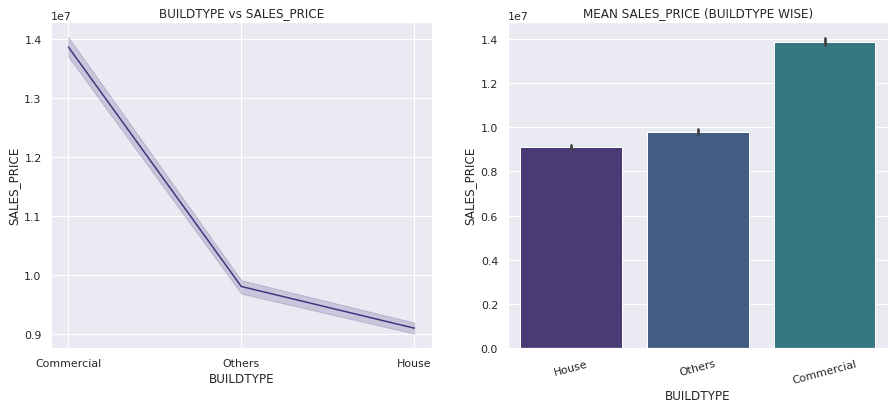

In [437]:
#BUILDTYPE vs SALES_PRICE distribution
sns.set_theme(style="darkgrid",palette="viridis")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x='BUILDTYPE',y='SALES_PRICE',data=data)
plt.title('BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=data,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')


- The sales price for commercial is higher than that of Others and Houses.
- Even though the houses are more than commercial and others the sales price is lower for houses.
- We cannot see linear pattern in the above graph so can use one hot encoding here.



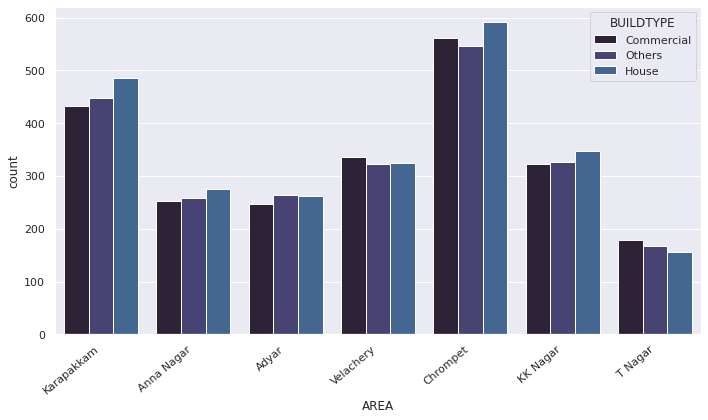

In [438]:
#BUILDTYPE VS AREA
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid",palette="mako")
ax=sns.countplot(x="AREA", hue="BUILDTYPE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- Most of the buildings are in Chrompet followed by Karapakkam and KK nagar.

#**PARK_FACIL**

In [439]:
data.PARK_FACIL.value_counts()

Yes    3584
No     3519
Name: PARK_FACIL, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (PARK_FACIL wise)')

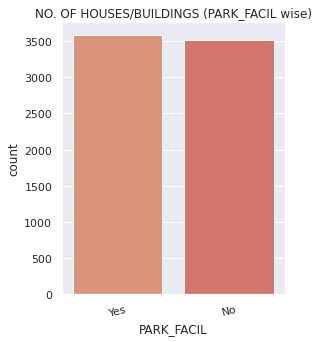

In [440]:
#PARK_FACIL distribution
plt.figure(figsize=(4,5)) 
sns.set_theme(style="darkgrid",palette="flare")
sns.countplot(x='PARK_FACIL',data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES/BUILDINGS (PARK_FACIL wise)')

Text(0.5, 1.0, 'MEAN SALES_PRICE (PARK_FACIL WISE)')

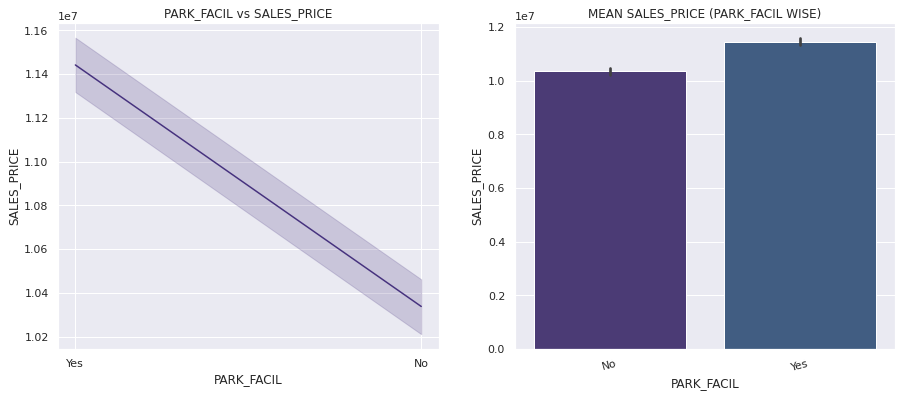

In [441]:
#PARK_FACIL vs SALES_PRICE
sns.set_theme(style="darkgrid",palette="viridis")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x='PARK_FACIL',y='SALES_PRICE',data=data)
plt.title('PARK_FACIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=data,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL WISE)')

- Sales price will be more  for the buildings with parking facility.
- Sinceis is binary categorical feature and also there is a linear pattern we can use label encoding here.

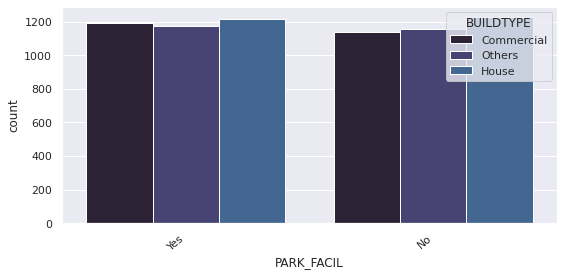

In [442]:
#BUILDTYPE VS PARK_FACIL
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid",palette="mako")
ax=sns.countplot(x="PARK_FACIL", hue="BUILDTYPE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- We can see comparitively most houses are with parking facilities and without parking available.
- The houses with parking facility is more than house without parking facilities. 

#**UTILITY_AVAIL**

In [443]:
data.UTILITY_AVAIL.value_counts()

No Sewer    3696
AllPub      1886
ELO         1521
Name: UTILITY_AVAIL, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (UTILITY_AVAIL wise)')

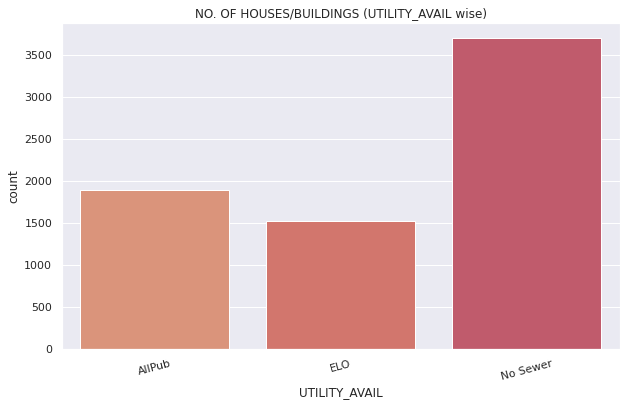

In [444]:
#UTILITY AVAIL distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="flare")
sns.countplot(x='UTILITY_AVAIL',data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES/BUILDINGS (UTILITY_AVAIL wise)')

- NoSewer buildings are higher than  buildings with ALLPUB and ELO.

Text(0.5, 1.0, 'MEAN SALES_PRICE (UTILITY_AVAIL WISE)')

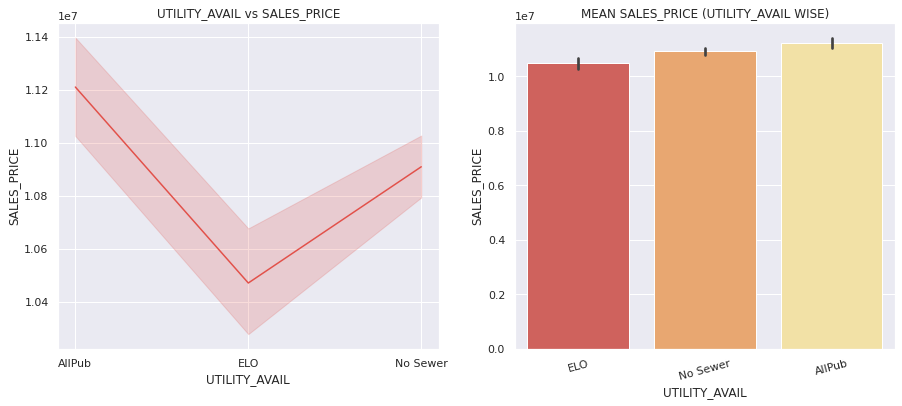

In [445]:
#UTILITY AVAIL vs SALESPRICE
sns.set_theme(style="darkgrid",palette="Spectral")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=data['UTILITY_AVAIL'],y=data['SALES_PRICE'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=data,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')

- Even though the No Sewer count is larger we can see the price is higher for ALL pub facility.
- We can see a linear pattern here so can use label encoding

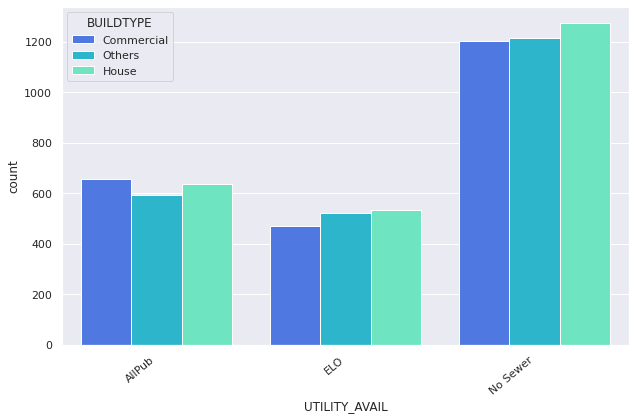

In [446]:
#UTILITY AVAIL vs BUILDTYPE
plt.figure(figsize=(9,6))
sns.set_theme(style="darkgrid",palette="rainbow")
ax=sns.countplot(x="UTILITY_AVAIL", hue="BUILDTYPE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- Most of the houses are with no sewer availability


#**STREET**

In [447]:
data.STREET.value_counts()

Paved        2570
Gravel       2518
No Access    2015
Name: STREET, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (STREET wise)')

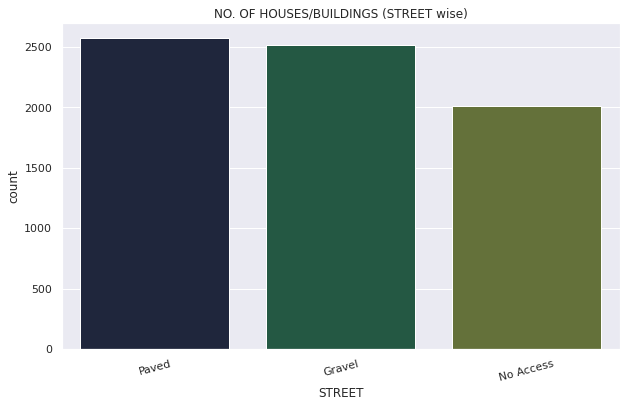

In [448]:
#STREET distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="cubehelix")
sns.countplot(x='STREET',data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES/BUILDINGS (STREET wise)')

- Most of the houses have paved street than Gravel.

Text(0.5, 1.0, 'MEAN SALES_PRICE (STREET wise)')

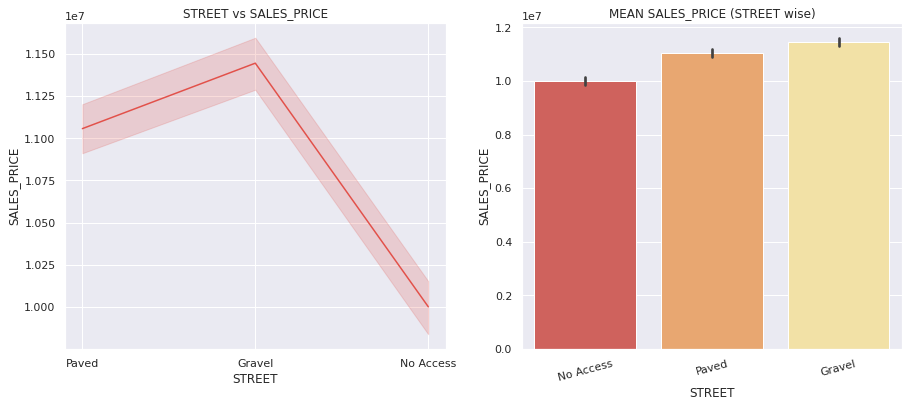

In [449]:
#STREET vs SALES_PRICE distribution
sns.set_theme(style="darkgrid",palette="Spectral")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=data['STREET'],y=data['SALES_PRICE'])
plt.title('STREET vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='STREET',y='SALES_PRICE',data=data,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET wise)')

- Sales_price is high for Buildings with Gravel followed by Paved.
- We can use label encoding here as there is linear pattern between salesprice and street.

---



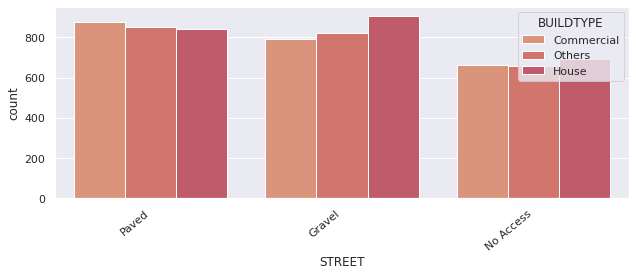

In [450]:
#STREET vs BUIILDTYPE
plt.figure(figsize=(9,4))
sns.set_theme(style="darkgrid",palette="flare")
ax=sns.countplot(x="STREET", hue="BUILDTYPE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- Most of the houses are Gravel followed by Paved and No access.
- Most of the Commercial buildings are made of paved streets.

Text(0.5, 1.0, 'SALES_PRICE VS STREET (BuildType wise)')

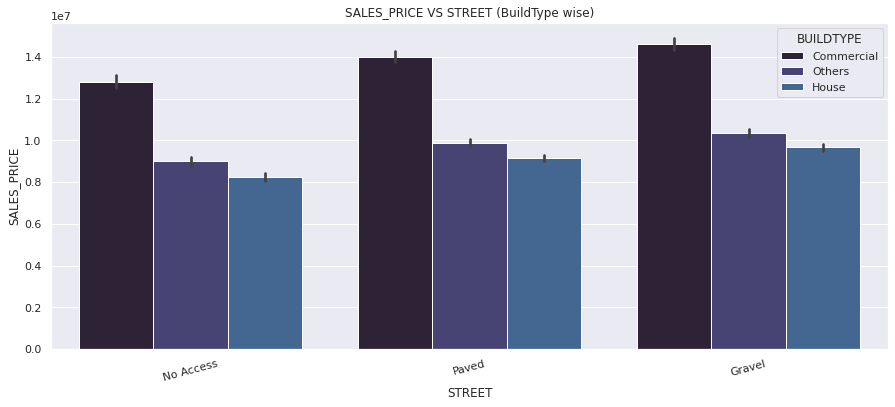

In [451]:
#STREET VS SALESPRICE VS BUILDTYPE
sns.set_theme(style="darkgrid",palette="mako")
plt.figure(figsize=(15,6))
sns.barplot(x='STREET',y='SALES_PRICE',data=data,hue='BUILDTYPE',order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS STREET (BuildType wise)')

- We can see most of the Commercial buildings are made of "Paved" street but still the price for Gravel is high comparatively.
- For all BUILDTYPEs the salesprice is high for "Gravel" street followed by "Paved" and "No Access".
- Sales price would be high if there is Gravel street. So those who are selling their property it would be an advantage to get high sales price.


#**MZZONE**

In [452]:
data.MZZONE.value_counts()

RL    1856
RH    1822
RM    1813
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Text(0.5, 1.0, 'NO. OF BUILDINGS (MZZONE wise)')

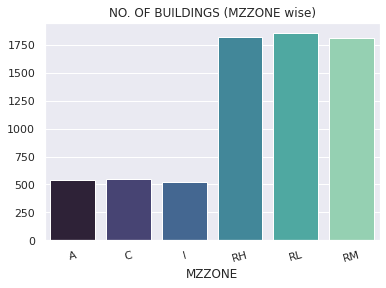

In [453]:
#MZZONE distribution
A=data['BUILDTYPE'].groupby(data['MZZONE']).count()
sns.barplot(x=A.index,y=A.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF BUILDINGS (MZZONE wise)')

- Most of the buildings are in RL followed by RH and RM Mzzones.

Text(0.5, 1.0, 'MEAN SALES_PRICE (MZZONE wise)')

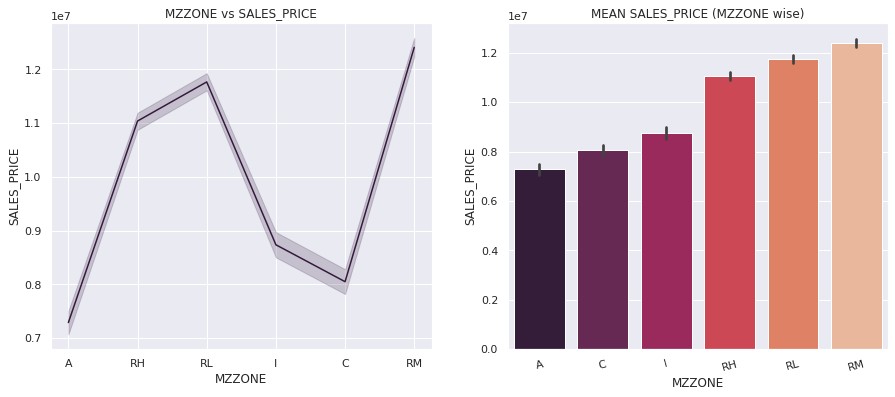

In [454]:
#MZZONE vs SALES_PRICE distribution

sns.set_theme(style="darkgrid",palette="rocket")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=data['MZZONE'],y=data['SALES_PRICE'])
plt.title('MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=data,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE wise)')

- Eventhough the RL zone has most of the buildings the sales price is high for RM zone followed by RL and RH.
- Can use label encoding here

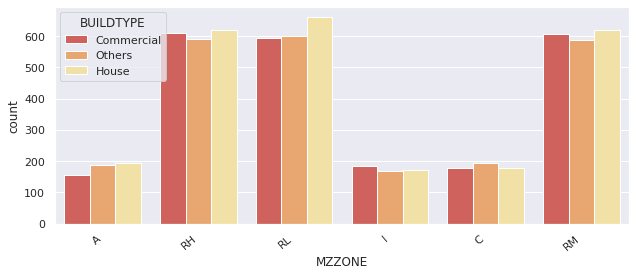

In [455]:
#MZONE VS BUILDTYPE
plt.figure(figsize=(9,4))
sns.set_theme(style="darkgrid",palette="Spectral")
ax=sns.countplot(x="MZZONE", hue="BUILDTYPE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- More houses are in RL zone followed by RM and RH.
- Least houses are available in I and C zones.

Text(0.5, 1.0, 'MEAN SALES_PRICE vs MZZONE(BuildType wise)')

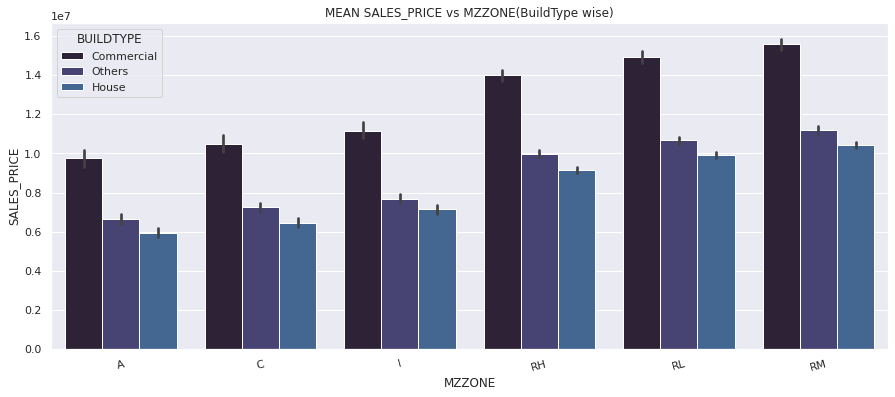

In [456]:
#MZONE VS BUILDTYPE vs SALESPRICE
sns.set_theme(style="darkgrid",palette="mako")
plt.figure(figsize=(15,6))
sns.barplot(x='MZZONE',y='SALES_PRICE',data=data,hue='BUILDTYPE',order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs MZZONE(BuildType wise)')

- Even though more houses are in RL,the house price is high at RM zone followed by RL and RH zones.
-Least Houses are available at "I" zone but the price is a bit high when compare wit "A" and "C" zones.

**Finding out min,max,avg sales price per BUILDTYPE and AREA**

In [457]:
#BUILDTYPE -Buildtype Commercial
buildtype_Com = data['BUILDTYPE']=='Commercial'
commercial=data.loc[buildtype_Com]
commercial.head() # Return all commercial building data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19
5,Chrompet,1220,2,1,4,Partial,No,Commercial,No Sewer,No Access,RH,4.5,2.6,3.1,3.320,12394750,4
7,Velachery,1847,3,2,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,9


In [458]:
#Finding mean,min,max of sales price for commercial building
min = commercial['SALES_PRICE'].min()
mean= commercial['SALES_PRICE'].mean()
max = commercial['SALES_PRICE'].max()

In [459]:
index=['Minimun_Sales_Price','Average_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,max],columns=['Commercial'],index=index)
comm

,Commercial
Minimun_Sales_Price,3.120000e+06
Average_Sales_Price,1.386984e+07
Maximum_Sales_Price,2.366734e+07


In [460]:
#BUILDTYPE-HOUSE
buildtype_House = data['BUILDTYPE']=='House'
house=data.loc[buildtype_House]
house.head() # Return all commercial building data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
16,Karapakkam,1639,2,2,4,Normal Sale,Yes,House,ELO,Gravel,I,2.3,3.2,4.8,3.570,8656000,17
25,T Nagar,1685,1,1,4,Family,No,House,No Sewer,Gravel,RM,2.8,4.4,4.0,3.740,12601080,33
28,Adyar,730,1,1,2,AdjLand,Yes,House,ELO,Gravel,RL,2.7,4.6,4.9,4.180,8848285,38
29,T Nagar,1806,2,1,5,Family,No,House,No Sewer,Paved,RH,4.1,5.0,3.0,3.830,11338200,34
30,Anna Nagar,1981,2,1,5,AdjLand,No,House,ELO,No Access,RL,2.0,3.1,3.2,2.755,12872430,8


In [461]:
#Finding mean,min,max of sales price for House building
min = house['SALES_PRICE'].min()
mean= house['SALES_PRICE'].mean()
max = house['SALES_PRICE'].max()

In [462]:
house = pd.DataFrame([min,mean,max],columns=['House'],index=index)
house

,House
Minimun_Sales_Price,2.640250e+06
Average_Sales_Price,9.098151e+06
Maximum_Sales_Price,1.588093e+07


In [463]:
#BUILDTYPE-Others
buildtype_others = data['BUILDTYPE']=='Others'
Others=data.loc[buildtype_others]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,max],columns=['Others'],index=index)
others


,Others
Minimun_Sales_Price,2.156875e+06
Average_Sales_Price,9.805210e+06
Maximum_Sales_Price,1.685901e+07


In [465]:
Build_type_new = pd.concat([comm,house,others],axis=1)
Build_type_new = pd.DataFrame(Build_type_new.T)
Build_type_new["Build_type"]=["Commercial","House","Others"]
Build_type_new

,Minimun_Sales_Price,Average_Sales_Price,Maximum_Sales_Price,Build_type
Commercial,3120000.0,1.386984e+07,23667340.0,Commercial
House,2640250.0,9.098151e+06,15880930.0,House
Others,2156875.0,9.805210e+06,16859010.0,Others


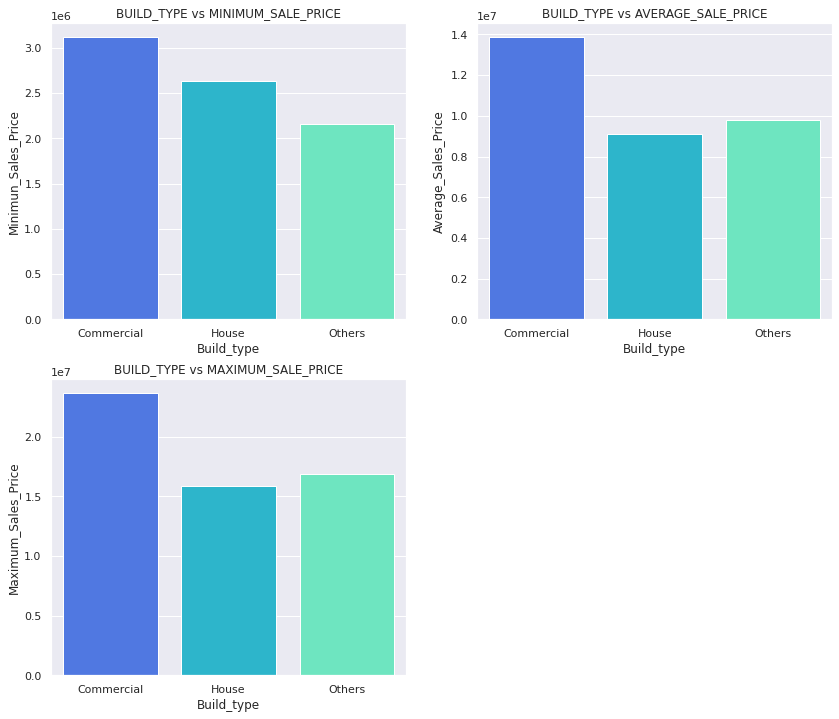

In [466]:
plt.figure(figsize=(14,12))
sns.set_theme(style="darkgrid",palette="rainbow")
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Build_type_new)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Average_Sales_Price",data=Build_type_new)
plt.title('BUILD_TYPE vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Build_type_new)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()


- In all graphs, the Minimum,Average and Maximum Price of commercial building is higher than "House" and "Others" building type.

- Minimum price of "House" price is higher than "Others" building type, but Maximum and Avg Price lower than "Others" building type.

- Minimum price of "Others" price is lower than "House" building type, but Maximum and Avg Price higher than "House" building type.

#**MIN,MAX and AVG Sales price of buildingtype on each area**


In [467]:
mean=pd.DataFrame(data[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
max=pd.DataFrame(data[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(data[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

In [468]:
min

SALES_PRICE
BUILDTYPE  AREA                   
Commercial Adyar           6036800
           Anna Nagar     15754040
           Chrompet        8071050
           KK Nagar       11286720
           Karapakkam      3120000
           T Nagar        16300260
           Velachery      10391900
House      Adyar           3869180
           Anna Nagar      9593040
           Chrompet        5340900
           KK Nagar        7410200
           Karapakkam      2640250
           T Nagar         9433610
           Velachery       5574400
Others     Adyar           4456285
           Anna Nagar     10245090
           Chrompet        5925790
           KK Nagar        7826780
           Karapakkam      2156875
           T Nagar        10573780
           Velachery       6074780

In [469]:
new_df = pd.concat([min['SALES_PRICE'].rename('Minimum'),mean['SALES_PRICE'].rename('Average'),max['SALES_PRICE'].rename('Maximum')],axis=1)
new_df

Minimum       Average   Maximum
BUILDTYPE  AREA                                        
Commercial Adyar        6036800  1.151977e+07  17360470
           Anna Nagar  15754040  1.994195e+07  23407860
           Chrompet     8071050  1.238855e+07  16026600
           KK Nagar    11286720  1.596759e+07  20246360
           Karapakkam   3120000  9.166997e+06  14486250
           T Nagar     16300260  2.011892e+07  23667340
           Velachery   10391900  1.426175e+07  18298710
House      Adyar        3869180  7.973683e+06  11409485
           Anna Nagar   9593040  1.241185e+07  15237150
           Chrompet     5340900  8.553965e+06  11845200
           KK Nagar     7410200  1.066675e+07  14276060
           Karapakkam   2640250  6.266440e+06   9966750
           T Nagar      9433610  1.266454e+07  15880930
           Velachery    5574400  9.036630e+06  12247960
Others     Adyar        4456285  8.209260e+06  11818860
           Anna Nagar  10245090  1.347034e+07  16859010
           Chrompet     5925790  9.153802e+06  12851040
           KK Nagar     7826780  1.163470e+07  14521700
           Karapakkam   2156875  6.737757e+06  11117625
           T Nagar     10573780  1.357577e+07  16766120
           Velachery    6074780  9.726395e+06  12669880

In [470]:
new_df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']  

new_df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]*3                      
new_df                                      

Minimum       Average   Maximum   BUILDTYPE  \
BUILDTYPE  AREA                                                       
Commercial Adyar        6036800  1.151977e+07  17360470  Commercial   
           Anna Nagar  15754040  1.994195e+07  23407860  Commercial   
           Chrompet     8071050  1.238855e+07  16026600  Commercial   
           KK Nagar    11286720  1.596759e+07  20246360  Commercial   
           Karapakkam   3120000  9.166997e+06  14486250  Commercial   
           T Nagar     16300260  2.011892e+07  23667340  Commercial   
           Velachery   10391900  1.426175e+07  18298710  Commercial   
House      Adyar        3869180  7.973683e+06  11409485       House   
           Anna Nagar   9593040  1.241185e+07  15237150       House   
           Chrompet     5340900  8.553965e+06  11845200       House   
           KK Nagar     7410200  1.066675e+07  14276060       House   
           Karapakkam   2640250  6.266440e+06   9966750       House   
           T Nagar      9433610  1.266454e+07  15880930       House   
           Velachery    5574400  9.036630e+06  12247960       House   
Others     Adyar        4456285  8.209260e+06  11818860      Others   
           Anna Nagar  10245090  1.347034e+07  16859010      Others   
           Chrompet     5925790  9.153802e+06  12851040      Others   
           KK Nagar     7826780  1.163470e+07  14521700      Others   
           Karapakkam   2156875  6.737757e+06  11117625      Others   
           T Nagar     10573780  1.357577e+07  16766120      Others   
           Velachery    6074780  9.726395e+06  12669880      Others   

                             AREA  
BUILDTYPE  AREA                    
Commercial Adyar            Adyar  
           Anna Nagar  Anna Nagar  
           Chrompet      Chrompet  
           KK Nagar      KK Nagar  
           Karapakkam   Karapakam  
           T Nagar        T Nagar  
           Velachery    Velachery  
House      Adyar            Adyar  
           Anna Nagar  Anna Nagar  
           Chrompet      Chrompet  
           KK Nagar      KK Nagar  
           Karapakkam   Karapakam  
           T Nagar        T Nagar  
           Velachery    Velachery  
Others     Adyar            Adyar  
           Anna Nagar  Anna Nagar  
           Chrompet      Chrompet  
           KK Nagar      KK Nagar  
           Karapakkam   Karapakam  
           T Nagar        T Nagar  
           Velachery    Velachery

**Minimum SALES PRICE for each AREA(BUILD TYPE wise)**

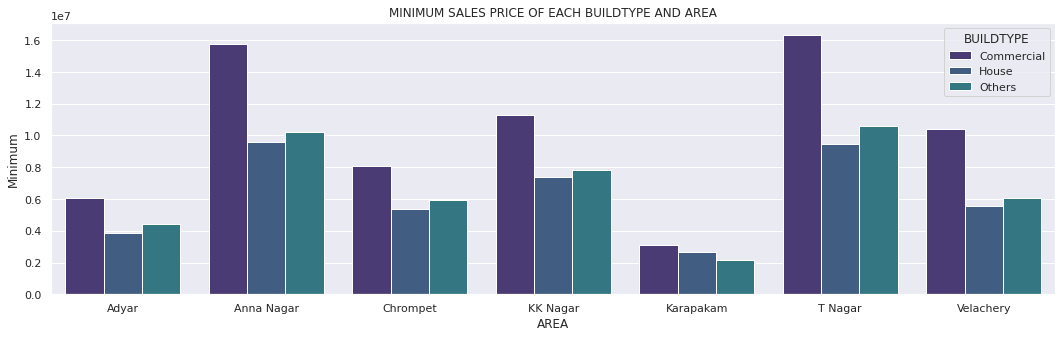

In [471]:
plt.figure(figsize=(18,5))
sns.set_theme(style="darkgrid",palette="viridis")
sns.barplot(x='AREA',y='Minimum',data=new_df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

- COMMERCIAL - Karapakkam area has the lowest price when compared with other area's. Followed with ("Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"). "T Nagar" is the first highest according to the "Sales_Price".

- HOUSE - Again Karapakam area has the lowest price when compared with other area's. Followed with ("Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"). Again "T Nagar" is the first highest according to the "Sales_Price".

- OTHERS - Again Karapakam area has the lowest price when compared with other area's. Followed with ("Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"). Again "T Nagar" is the first highest according to the "Sales_Price".

**Maximum SALES PRICE for each AREA(BUILD TYPE wise)**

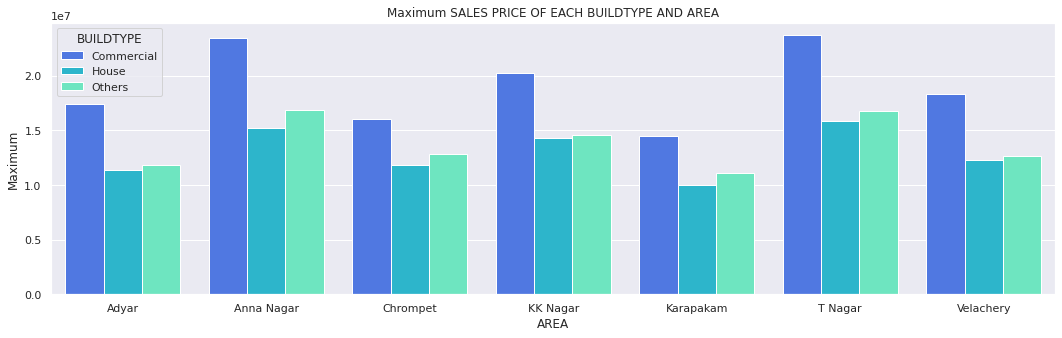

In [472]:
plt.figure(figsize=(18,5))
sns.set_theme(style="darkgrid",palette="rainbow")
sns.barplot(x='AREA',y='Maximum',data=new_df,hue='BUILDTYPE')
plt.title('Maximum SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

- COMMERCIAL - T Nagar area has the highest price when compared with other area's. Followed with (Anna Nagar,KK Nagar,Velachery,Adyar,Chrompet, Karapakkam). "Karapakkam" is the first lowest according to the "Sales_Price".

- HOUSE -  T Nagar followed by Anna Nagar has the highest price when compared with other area's. . Karapakkam is the first lowest according to the "Sales_Price".

- OTHERS - T Nagar followed by Anna Nagar has the highest price when compared with other area's. . Karapakkam is the first lowest according to the "Sales_Price".

#**ENCODING- Label and One hot**

- We are using label encoding for all the Categorical features except the feature called "BUILDTYPE" for that we use One Hot Encoding.

In [474]:
pd.DataFrame(data.dtypes.value_counts()).T

,object,int64,float64
0,7,6,4


- There are 7 features that we need to encode.

In [475]:
le=LabelEncoder()
data['PARK_FACIL']=le.fit_transform(data['PARK_FACIL'])
data['SALE_COND']=le.fit_transform(data['SALE_COND'])
data['UTILITY_AVAIL']=le.fit_transform(data['UTILITY_AVAIL'])
data['STREET']=le.fit_transform(data['STREET'])
data['MZZONE']=le.fit_transform(data['MZZONE'])

In [476]:
data.replace({"Karapakkam":0,"Adyar":1,"Chrompet":2,"Velachery":3,"KK Nagar":4,"Anna Nagar":5,"T Nagar":6},inplace=True)

In [480]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,0,1004,1,1,3,0,1,Commercial,0,2,0,4.0,3.9,4.9,4.330,7600000,43
1,5,1986,2,1,5,0,0,Commercial,0,0,3,4.9,4.2,2.5,3.765,21717770,10
2,1,909,1,1,3,0,1,Commercial,1,0,4,4.1,3.8,2.2,3.090,13159200,19
3,3,1855,3,2,5,2,0,Others,2,2,2,4.7,3.9,3.6,4.010,9630290,21
4,0,1226,1,1,3,0,1,Others,0,0,1,3.0,2.5,4.1,3.290,7406250,29


In [481]:
#BUILDTYPE one hot encoding
build_df=pd.get_dummies(data["BUILDTYPE"],prefix='BUIILDTYPE')
build_df

,BUIILDTYPE_Commercial,BUIILDTYPE_House,BUIILDTYPE_Others
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
7104,0,0,1
7105,0,0,1
7106,0,1,0
7107,1,0,0


In [482]:
import pandas as pd
new_data=pd.concat([data,build_df],axis=1)


In [483]:
new_data=new_data.drop(['BUILDTYPE'],axis=1)

In [484]:
new_data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,BUIILDTYPE_Commercial,BUIILDTYPE_House,BUIILDTYPE_Others
0,0,1004,1,1,3,0,1,0,2,0,4.0,3.9,4.9,4.330,7600000,43,1,0,0
1,5,1986,2,1,5,0,0,0,0,3,4.9,4.2,2.5,3.765,21717770,10,1,0,0
2,1,909,1,1,3,0,1,1,0,4,4.1,3.8,2.2,3.090,13159200,19,1,0,0
3,3,1855,3,2,5,2,0,2,2,2,4.7,3.9,3.6,4.010,9630290,21,0,0,1
4,0,1226,1,1,3,0,1,0,0,1,3.0,2.5,4.1,3.290,7406250,29,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,1,0,1,1,5,3.0,2.2,2.4,2.520,5353000,49,0,0,1
7105,3,1897,3,2,5,2,1,2,1,3,3.6,4.5,3.3,3.920,10818480,8,0,0,1
7106,3,1614,2,1,4,3,0,2,0,2,4.3,4.2,2.9,3.840,8351410,28,0,1,0
7107,0,787,1,1,2,4,1,1,2,4,4.6,3.8,4.1,4.160,8507000,31,1,0,0


#**DATA PREPROCESSING**

- TRAIN TEST SPLIT
- FEATURE SCALING - Normalized and Standardized
- FEATURE SELECTION - Correlation /Mutual Information

In [145]:
#Splitting into independent and dependent variables
#features=["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","HOUSE_AGE","BUIILDTYPE_Commercial","BUIILDTYPE_House","BUIILDTYPE_Others"]
#x=new_data.loc[:,features]
x=new_data.drop(labels=['SALES_PRICE'], axis=1)
x.shape

(7103, 18)

In [485]:
y=data["SALES_PRICE"].values
y.shape

(7103,)

**Train/Test split**

In [486]:

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((5682, 18), (5682,), (1421, 18), (1421,))

**Pearson Correlation between independent variables**

In [487]:
x_train.corr()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,HOUSE_AGE,BUIILDTYPE_Commercial,BUIILDTYPE_House,BUIILDTYPE_Others
AREA,1.000000,0.684932,0.319932,-0.046566,0.645173,-0.000890,0.016111,0.007267,0.006212,0.341652,0.022278,-0.006914,0.006003,0.013744,-0.069650,0.007321,-0.005229,-0.002054
INT_SQFT,0.684932,1.000000,0.784082,0.513837,0.951231,0.007077,0.009785,0.010202,0.002852,0.144465,0.024663,-0.007322,0.014420,0.020409,-0.003946,0.004439,-0.000312,-0.004120
N_BEDROOM,0.319932,0.784082,1.000000,0.753301,0.838433,0.010519,-0.016012,0.011529,-0.005596,0.050563,0.020198,0.000571,0.022190,0.025426,-0.036201,-0.002220,0.007692,-0.005518
N_BATHROOM,-0.046566,0.513837,0.753301,1.000000,0.565120,0.001888,-0.022254,0.012614,-0.019842,-0.043033,0.016649,0.003591,0.019332,0.022342,-0.010844,-0.007515,0.021945,-0.014564
N_ROOM,0.645173,0.951231,0.838433,0.565120,1.000000,0.009156,0.000787,0.014995,-0.006077,0.163819,0.019308,-0.004077,0.022196,0.023058,-0.024888,0.004295,0.001521,-0.005820
SALE_COND,-0.000890,0.007077,0.010519,0.001888,0.009156,1.000000,0.000621,0.005666,0.008942,0.014739,-0.011540,-0.020732,-0.010345,-0.022239,-0.005261,0.009252,0.016974,-0.026313
PARK_FACIL,0.016111,0.009785,-0.016012,-0.022254,0.000787,0.000621,1.000000,0.000164,0.000660,-0.011379,-0.009603,-0.017363,0.007678,-0.008399,-0.015584,0.006388,-0.001474,-0.004898
UTILITY_AVAIL,0.007267,0.010202,0.011529,0.012614,0.014995,0.005666,0.000164,1.000000,0.000011,0.008496,0.012224,0.009873,0.007378,0.017113,0.000708,-0.012284,0.004678,0.007565
STREET,0.006212,0.002852,-0.005596,-0.019842,-0.006077,0.008942,0.000660,0.000011,1.000000,-0.013691,0.019637,0.010392,-0.012701,0.011327,0.002112,0.022629,-0.025151,0.002691
MZZONE,0.341652,0.144465,0.050563,-0.043033,0.163819,0.014739,-0.011379,0.008496,-0.013691,1.000000,0.004122,-0.012726,0.002739,-0.004691,-0.104140,0.014249,0.005340,-0.019604


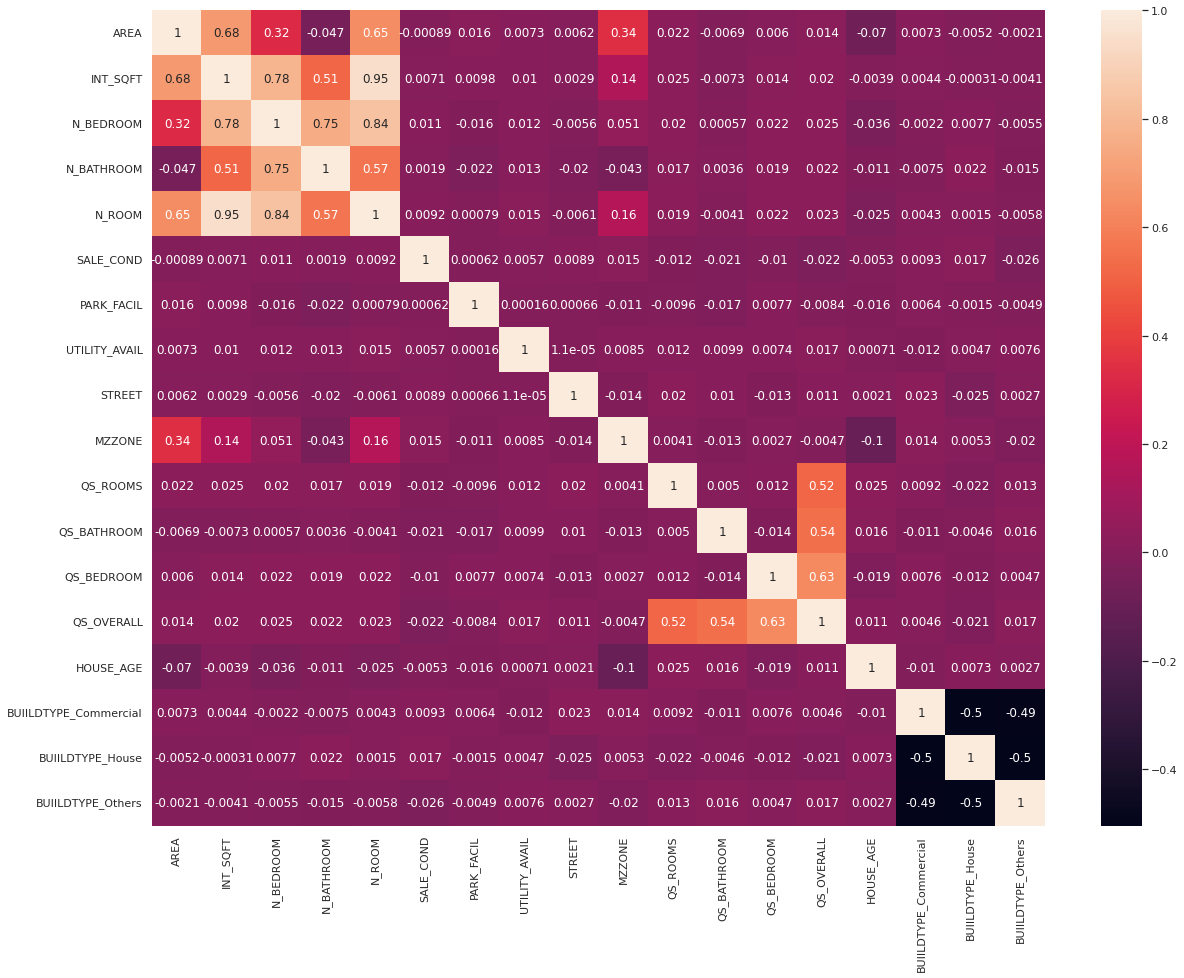

In [488]:

#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = x_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

- AREA is highly positively correlated with INT-SQFT,N_ROOM,MZONE.
- N_ROOM,N_BATHROOM,N_BEDROOM,INT_SQFT are highly positively correlated.


In [150]:
# # with the following function we can select highly correlated features
# # it will remove the first feature that is correlated with anything other feature

# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

In [151]:
# corr_features = correlation(x_train, 0.78)
# len(set(corr_features))

In [152]:
# print(f"The feature which is highly correlated above .8 is  {corr_features}")

In [153]:
# x_train_new=x_train.drop(corr_features,axis=1)
# x_test_new=x_test.drop(corr_features,axis=1)
# x_train_new.shape

#**Feature Selection - Mutual Information on Regression**

In [489]:
# Mutual information between independant features and the target variables

# determine the mutual information
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

array([0.41476201, 0.39157218, 0.16176432, 0.03765056, 0.29055697,
       0.00574825, 0.01684022, 0.0060482 , 0.01601468, 0.13858787,
       0.        , 0.        , 0.        , 0.        , 0.03806335,
       0.19211368, 0.07990388, 0.04233461])

In [490]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

AREA                     0.414762
INT_SQFT                 0.391572
N_ROOM                   0.290557
BUIILDTYPE_Commercial    0.192114
N_BEDROOM                0.161764
MZZONE                   0.138588
BUIILDTYPE_House         0.079904
BUIILDTYPE_Others        0.042335
HOUSE_AGE                0.038063
N_BATHROOM               0.037651
PARK_FACIL               0.016840
STREET                   0.016015
UTILITY_AVAIL            0.006048
SALE_COND                0.005748
QS_ROOMS                 0.000000
QS_BATHROOM              0.000000
QS_BEDROOM               0.000000
QS_OVERALL               0.000000
dtype: float64

- AREA is the most important feature followed by INT-SQFT and N_ROOM to predict the target variable.

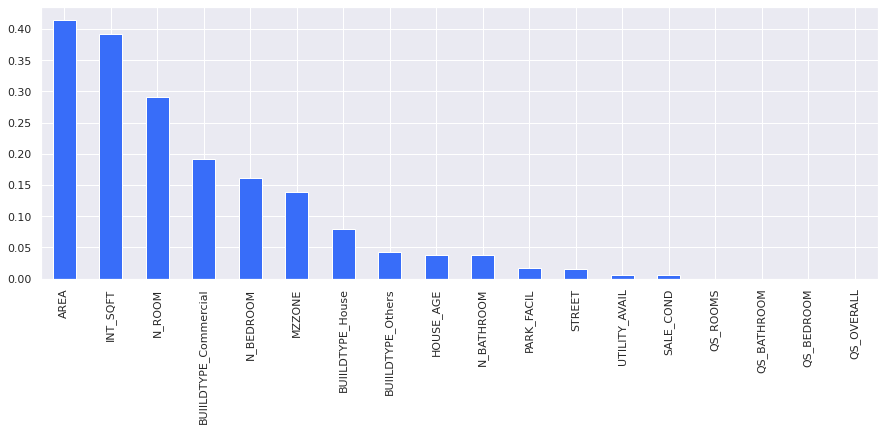

In [491]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [495]:
sel_ten_cols = SelectKBest(mutual_info_regression, k=14)
sel_ten_cols.fit(x_train, y_train)
x_train.columns[sel_ten_cols.get_support()]

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'BUIILDTYPE_Commercial', 'BUIILDTYPE_House', 'BUIILDTYPE_Others'],
      dtype='object')

In [496]:
feature_not_ranked=[]
for col in x_train.columns:
  if col not in x_train.columns[sel_ten_cols.get_support()]:
     feature_not_ranked.append(col)
print(feature_not_ranked)

[]


In [497]:
x_train=x_train.drop(feature_not_ranked,axis=1)
x_test=x_test.drop(feature_not_ranked,axis=1)
x_train.shape ,y_train.shape, x_test.shape, y_test.shape

((5682, 14), (5682,), (1421, 14), (1421,))

In [498]:
#Just tried another feature importance method
model = ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor()

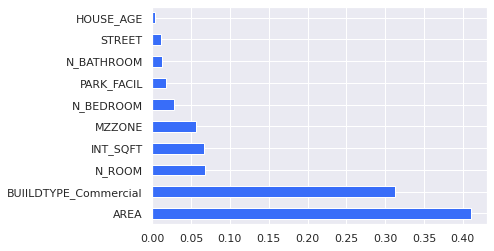

In [499]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Feature scaling**


In [500]:
#Normalization

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
# transform training data
X_train_norm = norm.transform(x_train)
# transform testing dataabs
X_test_norm = norm.transform(x_test)

In [501]:
X_train_norm=pd.DataFrame(X_train_norm,columns=x_train.columns)
X_train_norm

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE,BUIILDTYPE_Commercial,BUIILDTYPE_House,BUIILDTYPE_Others
0,0.666667,0.871436,1.000000,1.0,1.00,0.25,1.0,0.0,0.0,0.6,0.134615,0.0,0.0,1.0
1,0.000000,0.004002,0.000000,0.0,0.00,0.50,1.0,1.0,0.0,0.0,0.730769,0.0,1.0,0.0
2,0.000000,0.076038,0.000000,0.0,0.00,0.50,0.0,1.0,0.0,0.2,0.038462,0.0,1.0,0.0
3,0.666667,0.847424,0.666667,1.0,0.75,1.00,0.0,1.0,0.0,0.6,0.038462,1.0,0.0,0.0
4,0.333333,0.104552,0.000000,0.0,0.00,0.25,1.0,0.5,0.0,1.0,0.634615,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,0.000000,0.097549,0.000000,0.0,0.00,0.00,0.0,1.0,0.0,0.2,0.673077,0.0,1.0,0.0
5678,0.833333,0.503752,0.000000,0.0,0.50,0.00,1.0,1.0,0.0,0.6,0.115385,1.0,0.0,0.0
5679,0.833333,0.735368,0.333333,0.0,0.75,1.00,1.0,0.5,1.0,0.8,0.115385,0.0,1.0,0.0
5680,0.333333,0.112056,0.000000,0.0,0.00,0.75,1.0,1.0,0.0,1.0,0.576923,0.0,1.0,0.0


In [502]:
X_test_norm=pd.DataFrame(X_test_norm,columns=x_test.columns)
X_test_norm

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE,BUIILDTYPE_Commercial,BUIILDTYPE_House,BUIILDTYPE_Others
0,0.000000,0.000000,0.000000,0.0,0.00,0.50,1.0,0.5,0.0,0.8,0.500000,0.0,0.0,1.0
1,0.333333,0.395698,0.333333,0.0,0.50,0.50,1.0,1.0,0.0,0.8,0.519231,0.0,1.0,0.0
2,0.000000,0.275138,0.000000,0.0,0.25,0.25,1.0,0.0,1.0,0.6,0.423077,0.0,0.0,1.0
3,0.000000,0.592796,0.333333,1.0,0.50,0.00,0.0,1.0,0.0,0.2,0.673077,0.0,1.0,0.0
4,0.333333,0.209605,0.000000,0.0,0.25,0.50,1.0,0.5,0.0,0.8,0.365385,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1.000000,0.536268,0.000000,0.0,0.50,0.50,0.0,0.5,1.0,1.0,0.384615,1.0,0.0,0.0
1417,1.000000,0.727864,0.333333,0.0,0.75,1.00,1.0,0.0,0.0,0.8,0.750000,0.0,1.0,0.0
1418,0.500000,0.539770,0.333333,0.0,0.50,0.00,1.0,0.5,1.0,0.4,0.384615,1.0,0.0,0.0
1419,0.500000,0.577789,0.333333,0.0,0.50,0.00,1.0,0.0,1.0,0.6,0.038462,0.0,1.0,0.0


In [505]:
X_train_norm.shape,X_test_norm.shape

((5682, 14), (1421, 14))

#**Model Building**

In [506]:

def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

In [507]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])


**Linear Regression**

In [508]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm, y_train)
y_pred = lin_reg.predict(X_test_norm)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 864433.0387051372
MSE: 1251976882768.2646
RMSE: 1118917.7283287027
R2 Score: 0.9138801256186072
------------------------------


**Ridge Regression**

In [509]:
ridge = Ridge()
ridge.fit(X_train_norm, y_train)
y_pred = ridge.predict(X_test_norm)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 866240.9014495758
MSE: 1251058915139.6987
RMSE: 1118507.449747072
R2 Score: 0.913943269960924
------------------------------


**Lasso Regression**

In [510]:
lasso = Lasso()
lasso.fit(X_train_norm, y_train)
y_pred = lasso.predict(X_test_norm)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 866094.5915663036
MSE: 1250323677505.9739
RMSE: 1118178.7323616801
R2 Score: 0.9139938448345726
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+14, tolerance: 8.025e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


**Decision Tree Regressor**

In [511]:
#Hyperparameter tuning
param_grid = {
    'max_depth':[1,2,3,4,5,6,7,8,9,10,20,40,60]}

In [512]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [513]:
reg.fit(X_train_norm,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40,
                                       60]})

In [514]:
reg.best_params_

{'max_depth': 60}

In [515]:

y_pred = reg.predict(X_test_norm)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "Decision Tree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 484537.6988036594
MSE: 378041992190.21814
RMSE: 614851.1951604373
R2 Score: 0.9739955830443723
------------------------------


In [516]:

y_pred

array([ 7854000., 11409485.,  6368000., ..., 14149250.,  9150510.,
        8894000.])

In [517]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,6606250,7854000.0
1,10499650,11409485.0
2,7877250,6368000.0
3,6922750,7242250.0
4,8984050,8924700.0
...,...,...
1416,18235960,17560410.0
1417,13986310,14102960.0
1418,13364730,14149250.0
1419,10006870,9150510.0


**Random Forest Regressor**

In [518]:

params = {'n_estimators': [100, 200, 300, 1000]}
print(params)

{'n_estimators': [100, 200, 300, 1000]}


In [519]:
rf = RandomForestRegressor()

In [520]:
model = GridSearchCV(rf, params, cv=5)
model.fit(X_train_norm,y_train) 
model.best_params_


{'n_estimators': 1000}

In [521]:


mae, mse, rmse, r_squared = evaluation(y_test,y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 484537.6988036594
MSE: 378041992190.21814
RMSE: 614851.1951604373
R2 Score: 0.9739955830443723
------------------------------


In [522]:
y_pred = model.predict(X_test_norm)
y_pred

array([ 6380637.5  , 10778703.445,  7391159.625, ..., 13876027.955,
        9484270.45 ,  8444741.14 ])

In [523]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,6606250,6.380638e+06
1,10499650,1.077870e+07
2,7877250,7.391160e+06
3,6922750,7.124093e+06
4,8984050,9.277650e+06
...,...,...
1416,18235960,1.812924e+07
1417,13986310,1.401300e+07
1418,13364730,1.387603e+07
1419,10006870,9.484270e+06


**XGBoost Regressor**

In [524]:

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01,objective='reg:squarederror')
xgb.fit(X_train_norm, y_train)
y_pred = xgb.predict(X_test_norm)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 293581.66537649545
MSE: 144765237630.86612
RMSE: 380480.2723281013
R2 Score: 0.9900420173477993
------------------------------


In [525]:
y_pred=xgb.predict(X_test_norm)
y_pred

array([ 7137047. , 10079300. ,  7746166.5, ..., 13375822. ,  9645362. ,
        8552204. ], dtype=float32)

In [526]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,6606250,7137047.0
1,10499650,10079300.0
2,7877250,7746166.5
3,6922750,6933635.5
4,8984050,9244308.0
...,...,...
1416,18235960,18046916.0
1417,13986310,13973860.0
1418,13364730,13375822.0
1419,10006870,9645362.0


**KNN for regression**

In [527]:
#Hyperparameter tuning-Finding the best value of k using GridSearchCV

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,30,80]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_norm,y_train)
model.best_params_

{'n_neighbors': 4}

In [528]:


mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "KNN","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 293581.66537649545
MSE: 144765237630.86612
RMSE: 380480.2723281013
R2 Score: 0.9900420173477993
------------------------------


In [529]:
y_pred=model.predict(X_test_norm)

In [530]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,6606250,8700086.25
1,10499650,10398802.50
2,7877250,7630377.50
3,6922750,6987087.50
4,8984050,8884012.50
...,...,...
1416,18235960,18294542.50
1417,13986310,14549492.50
1418,13364730,14655000.00
1419,10006870,10083325.00


In [531]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
5,XGBRegressor,293581.665376,1.447652e+11,3.804803e+05,0.990042
6,KNN,293581.665376,1.447652e+11,3.804803e+05,0.990042
3,Decision Tree,484537.698804,3.780420e+11,6.148512e+05,0.973996
4,RandomForestRegressor,484537.698804,3.780420e+11,6.148512e+05,0.973996
2,Lasso,866094.591566,1.250324e+12,1.118179e+06,0.913994
1,Ridge,866240.901450,1.251059e+12,1.118507e+06,0.913943
0,LinearRegression,864433.038705,1.251977e+12,1.118918e+06,0.913880


**XGBoost Regressor is the best model followed by KNN,Decison Tree and Random Forest**

#**Suggestions to Sellers and Buyers**

**Sellers** - If any sellers want to build any type of building in chennai. I would suggest them to build a "Commercial" building. When it comes to the location I would suggest "T Nagar", as the first choice because the 'average/minimum/maximum sales_price' of "T Nagar" is higher than other Area. I would suggest the agent to build with the "Parking facility" and with "All_Utility" . Gravel type street fetches more money than Paved street. I will strongly suggest not to construct any type of building which has no access to the building.

**Buyers** - The average sales_price of "house" building is lesser than "Others" & "Commercial" type buildings. When it comes to the location I would suggest Buyers to buy in Karapakam followed by Chrompet and Adyar, because the price is much lowers than any other area and also it is near to the beach.
